In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import re
import os
from tqdm import tqdm
from tqdm.std import trange
import matplotlib.pyplot as plt
import tikzplotlib
from scipy.stats import spearmanr

In [4]:
professions_file = "/proj/sbaruah/subtitle/profession/csl/data/mentions/professions.word_filtered.sense_filtered.merged.csv"
profession_media_dir = "/proj/sbaruah/subtitle/profession/csl/data/analysis_data/media_data/profession"
soc_media_dir = "/proj/sbaruah/subtitle/profession/csl/data/analysis_data/media_data/soc"

In [5]:
professions_df = pd.read_csv(professions_file, index_col = None)

In [6]:
professions = professions_df["profession_merge"].unique()[:500]

In [7]:
profession_dfs = [pd.read_csv(os.path.join(profession_media_dir, profession + ".csv")) for profession in professions]

In [8]:
doctor_df = profession_dfs[0]
sketch_artist_df = profession_dfs[-1]
print(professions[0], professions[-1])

doctor sketch artist


In [9]:
doctor_df = doctor_df[doctor_df["n_titles"] >= 30]
sketch_artist_df = sketch_artist_df[sketch_artist_df["n_titles"] >= 30]

print(doctor_df.shape, sketch_artist_df.shape)

(531, 216) (531, 216)


In [10]:
doctor_var_srs = doctor_df.iloc[:,:-7].var()

In [11]:
doctor_var_srs

year                    175.442085
Genre:Action              0.129517
Genre:Adult               0.000000
Genre:Adventure           0.085456
Genre:Animation           0.090019
                           ...    
Country:West Germany      0.000000
Country:Yemen             0.000000
Country:Yugoslavia        0.000000
Country:Zambia            0.000000
Country:Zimbabwe          0.000000
Length: 208, dtype: float64

In [12]:
doctor_df.columns

Index(['year', 'kind', 'Genre:Action', 'Genre:Adult', 'Genre:Adventure',
       'Genre:Animation', 'Genre:Biography', 'Genre:Comedy', 'Genre:Crime',
       'Genre:Documentary',
       ...
       'Country:Yugoslavia', 'Country:Zambia', 'Country:Zimbabwe', 'n_titles',
       'n_total_mentions', 'n_mentions', 'n_pos_mentions', 'n_neg_mentions',
       'freq', 'sentiment'],
      dtype='object', length=216)

In [13]:
doctor_var_srs.index[doctor_var_srs > 0]

Index(['year', 'Genre:Action', 'Genre:Adventure', 'Genre:Animation',
       'Genre:Biography', 'Genre:Comedy', 'Genre:Crime', 'Genre:Documentary',
       'Genre:Drama', 'Genre:Family', 'Genre:Fantasy', 'Genre:Game-Show',
       'Genre:History', 'Genre:Horror', 'Genre:Music', 'Genre:Musical',
       'Genre:Mystery', 'Genre:News', 'Genre:Reality-TV', 'Genre:Romance',
       'Genre:Sci-Fi', 'Genre:Short', 'Genre:Sport', 'Genre:Thriller',
       'Genre:War', 'Genre:Western', 'Country:Canada', 'Country:Japan',
       'Country:United Kingdom', 'Country:United States'],
      dtype='object')

In [14]:
sketch_artist_var_srs = sketch_artist_df.iloc[:,:-7].var()
sketch_artist_var_srs.index[sketch_artist_var_srs > 0]

Index(['year', 'Genre:Action', 'Genre:Adventure', 'Genre:Animation',
       'Genre:Biography', 'Genre:Comedy', 'Genre:Crime', 'Genre:Documentary',
       'Genre:Drama', 'Genre:Family', 'Genre:Fantasy', 'Genre:Game-Show',
       'Genre:History', 'Genre:Horror', 'Genre:Music', 'Genre:Musical',
       'Genre:Mystery', 'Genre:News', 'Genre:Reality-TV', 'Genre:Romance',
       'Genre:Sci-Fi', 'Genre:Short', 'Genre:Sport', 'Genre:Thriller',
       'Genre:War', 'Genre:Western', 'Country:Canada', 'Country:Japan',
       'Country:United Kingdom', 'Country:United States'],
      dtype='object')

In [15]:
for profession_df in profession_dfs:
    profession_df["n_sentiment_mentions"] = profession_df["n_pos_mentions"] + profession_df["n_neg_mentions"]

In [29]:
for profession, profession_df in zip(professions, profession_dfs):
    freq_profession_df = profession_df[(profession_df["n_titles"] >= 30) & (profession_df["n_total_mentions"] > 0)]
    freq_profession_var_srs = freq_profession_df.iloc[:,:-8].var()
    non_singular_columns = freq_profession_var_srs.index[freq_profession_var_srs > 0].tolist()
    if freq_profession_df["kind"].unique().size > 0:
        non_singular_columns.append("kind")
    freq_profession_df = freq_profession_df[non_singular_columns + ["n_total_mentions", "freq"]]
    
    sentiment_profession_df = profession_df[(profession_df["n_titles"] >= 30) & (profession_df["n_sentiment_mentions"] > 0)]
    sentiment_profession_var_srs = sentiment_profession_df.iloc[:,:-8].var()
    non_singular_columns = sentiment_profession_var_srs.index[sentiment_profession_var_srs > 0].tolist()
    if sentiment_profession_df["kind"].unique().size > 0:
        non_singular_columns.append("kind")
    sentiment_profession_df = sentiment_profession_df[non_singular_columns + ["n_sentiment_mentions", "sentiment"]]
    
    print(profession, freq_profession_df.shape, sentiment_profession_df.shape)

doctor (531, 33) (504, 31)
police (531, 33) (350, 28)
captain (531, 33) (296, 28)
cop (531, 33) (388, 28)
officer (531, 33) (384, 28)
president (531, 33) (302, 29)
detective (531, 33) (274, 26)
teacher (531, 33) (406, 31)
lawyer (531, 33) (398, 29)
soldier (531, 33) (293, 32)
general (531, 33) (178, 28)
lieutenant (531, 33) (171, 25)
professor (531, 33) (299, 29)
director (531, 33) (259, 28)
judge (531, 33) (246, 27)
sergeant (531, 33) (172, 26)
commander (531, 33) (128, 27)
guard (531, 33) (258, 29)
artist (531, 33) (417, 30)
manager (531, 33) (296, 31)
inspector (531, 33) (101, 22)
minister (531, 33) (139, 24)
nurse (531, 33) (310, 29)
district attorney (531, 33) (114, 23)
coach (531, 33) (251, 29)
chef (531, 33) (320, 27)
sheriff (531, 33) (99, 23)
actor (531, 33) (330, 31)
priest (531, 33) (161, 26)
mayor (531, 33) (219, 27)
major (531, 33) (79, 23)
secretary (531, 33) (188, 26)
attorney (531, 33) (234, 25)
scientist (531, 33) (314, 28)
writer (531, 33) (298, 28)
reporter (531, 33)

In [40]:
def binomial_glm(df, out="freq", N="n_total_mentions"):
    df.columns = [re.sub("\W+", "_", c.strip()) for c in df.columns]
    df = df[(df[N] > 0) & (df["n_titles"] >= 30)]
    var = df.iloc[:,:-8].var()
    non_singular_columns = var.index[var > 0].tolist()
    if df["kind"].unique().size > 0:
        non_singular_columns.append("kind")
    df = df[non_singular_columns + [N, out]]
    print(df.shape)
    if df.shape[0] >= 5 and df.shape[1] > 2:

        genres = [c for c in df.columns if c.startswith("Genre")]
        countries = [c for c in df.columns if c.startswith("Country")]
        rhs = []
        if "year" in df.columns:
            rhs.append("year")
        if "kind" in df.columns:
            rhs.append("kind")
        for genre in genres:
            rhs.append("C({})".format(genre))
        for country in countries:
            rhs.append("C({})".format(country))
        rhs = " + ".join(rhs)
        formula = "{} ~ {}".format(out, rhs)
        model = smf.glm(formula, df, family = sm.families.Binomial(), var_weights = df[N])
        result = model.fit()
        
        coefficients = pd.concat([result.params, result.pvalues], axis = 1)
        coefficients.columns = ["coefficient", "pvalue"]
        coefficients.index.name = "param"
        coefficients = coefficients[coefficients["pvalue"] < 0.05]
        return coefficients, result

In [43]:
n_freq_error = 0
n_sentiment_error = 0

for i, (profession, profession_media_df) in enumerate(zip(professions, profession_dfs)):
    print(i, profession)
    profession_media_df["n_sentiment_mentions"] = profession_media_df["n_pos_mentions"] + profession_media_df["n_neg_mentions"]

    try:
        freq_result = binomial_glm(profession_media_df, out="freq", N="n_total_mentions")
        if freq_result is not None:
            freq_coefficients, freq_glm = freq_result
            freq_coefficients.to_csv(os.path.join(profession_media_dir, profession + ".freq.coeff.csv"), index=True)
            freq_glm.save(os.path.join(profession_media_dir, profession + ".freq.glm"))
            print(freq_coefficients.index.tolist())
            print()
    except Exception:
        n_freq_error += 1

    try:
        sentiment_result = binomial_glm(profession_media_df, out="sentiment", N="n_sentiment_mentions")
        if sentiment_result is not None:
            sentiment_coefficients, sentiment_glm = sentiment_result
            sentiment_coefficients.to_csv(os.path.join(profession_media_dir, profession + ".sentiment.coeff.csv"), index=True)
            sentiment_glm.save(os.path.join(profession_media_dir, profession + ".sentiment.glm"))
            print(sentiment_coefficients.index.tolist())
    except:
        n_sentiment_error += 1

    print("\n\n")
    
print(n_freq_error, n_sentiment_error)

0 doctor
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Musical)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_Japan)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(504, 31)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']



1 police
(531, 33)
['In

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



12 professor
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(299, 29)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]']



13 director
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_G

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]']



24 coach
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(251, 29)
[]



25 chef
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(G

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(99, 23)
['C(Genre_Action)[T.1]']



27 actor
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(330, 31)
['C(Genre_Drama)[T.1]']



28 priest
(531, 33)
['Intercept', 'C

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



31 secretary
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(188, 26)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Action)[T.1]', 'C(Country_United_States)[T.1]']



32 attorney
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(234, 25)
['Intercept', 'year']



33 scientist
(531, 33)
['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'C(

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Drama)[T.1]', 'C(Genre_Reality_TV)[T.1]']



34 writer
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(298, 28)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]']



35 reporter
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(132, 26)
['Intercept', 'C(Genre_Family)[T.1]', 'year']



37 pilot
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(108, 23)
[]



49 producer
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_Japan)[T.1]', 'C(Country_United_States)[T.1]']

(192, 27)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]']



50 engineer
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_Canada)[T.1]', 'year']

(181, 26)
['kind[T.movie]', 'C(Genre_Documentary)[T.1]']



51 surgeon
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(C

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]']



52 police officer
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(129, 23)
['kind[T.movie]', 'C(Genre_Crime)[T.1]']



53 chairman
(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Japan)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(71, 22)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



54 actress
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]']

(252, 25)
['Intercept', 'C(Country_United_Kingdom)[T.1]', 'year']



55 cook
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(281, 28)
[]



56 monk
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', '

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']



60 prosecutor
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(102, 19)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]', 'year']



61 principal
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Music)[T.1]',

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(176, 25)
[]



65 poet


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(142, 25)
['C(Genre_Thriller)[T.1]']



66 sailor


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Musical)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]']

(124, 23)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Country_United_States)[T.1]', 'year']



67 ambassador
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sport)[T.1]']

(213, 27)
['Intercept', 'C(Genre_Comedy)[T.1]', 'year']



69 marshall
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(48, 19)
['C(Genre_Mystery)[T.1]']



70 counsellor
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(190, 24)
[]



81 reverend
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(88, 24)
[]



82 constable


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(34, 21)
[]



83 painter
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(117, 24)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



84 operator
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'year']

(58, 22)
[]



85 psychiatrist


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(127, 23)
['C(Genre_Comedy)[T.1]']



86 dentist
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]']

(115, 23)
[]



87 corporal
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(118, 25)
[]



89 messenger
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Biography)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]']

(33, 16)
['Intercept', 'year']



90 clerk
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(81, 24)
['C(Genre_Action)[T.1]', 'C(Genre_Mystery)[T.1]']



91 author
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Japan)[T.1]', 'year']

(172, 28)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Animation)[T.1]']



92 warden
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(58, 22)
[]



93 bodyguard
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]']

(60, 22)
[]



94 mechanic
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_Canada)[T.1]', 'year']

(117, 23

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(57, 18)
[]



98 merchant
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Un

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(128, 24)
[]



104 keeper
(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(58, 22)
['C(Genre_Animation)[T.1]', 'C(Genre_Drama)[T.1]']



105 escort
(531, 33)
['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_War)[T.1]']

(62, 22)
['C(Genre_Thriller)[T.1]']



106 dean
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



111 fisherman
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Musical)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(50, 25)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Romance)[T.1]']



112 cleaner
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_Japan)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(68, 20)
['C(Genre_Action)[T.1]', 'C(Genre_Thriller)[T.1]']



113 counsel
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(53, 15)
[]



114 stripper
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_An

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



119 coroner
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(14, 16)



120 boxer
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(56, 19)
[]



121 superintendent
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(22, 20)
[]



122 trainer
(531, 33)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(100, 23)
[]



123 executive
(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



124 butcher
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(70, 26)
[]



125 comedian
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Japan)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(122, 23)
[]



126 security guard
(531, 33)
['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(80, 19)
[]



127 instructor


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



131 psychologist
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(84, 22)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



132 miner
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]']

(32, 21)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



133 medic
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(26, 19)
[]



134 consultant
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(105, 19)
[]



135 paramedic
(531, 33)
['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]']

(

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(75, 16)
['C(Genre_Comedy)[T.1]']



139 plumber
(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(64, 19)
[]



140 contractor
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_Unit

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]']

(102, 23)
['C(Genre_Action)[T.1]', 'C(Genre_Mystery)[T.1]']



145 chancellor
(531, 33)
['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_News)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]']

(26, 22)



146 courier
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(15, 16)



147 movie star
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(140, 22)
[]



148 critic
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(57, 22)
[]



149 butler
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(71, 22)
[]



150 operative
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', '

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_History)[T.1]']

(74, 24)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



153 cadet
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(24, 16)
[]



154 foreman
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]', 'year']

(18, 19)



155 ss
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Drama)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(4, 9)



156 hacker
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(57, 19)
['Intercept', 'year']



157 builder
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(44, 21)
['year']



158 president of the united states
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(51, 24)
[]



160 technician
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_Japan)[T.1]', 'year']

(40, 21)
[]



161 broker
(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(32, 16)
[]



162 headmaster


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(23, 13)



163 tutor
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(64, 19)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



164 guide
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]']

(79, 25)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



165 carpenter
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(46, 19)
['Intercept', 'kind[T.movie]', 'year']



166 tailor
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_War)[T.1]', 'year']

(49, 24)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



167 rock star
(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(178, 22)
[]



168 apprentice
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]']

(16, 14)



169 drummer
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(69, 25)
[]



170 police force


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(27, 14)
[]



171 solicitor
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(32, 16)
[]



172 barber
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_Canada)[T.1]', 'year']

(38, 17)
[]



173 justice
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_M

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(27, 10)
[]



175 chauffeur
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(31, 18)
[]



176 cameraman


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(37, 15)
[]



177 jockey


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(59, 21)
['C(Genre_Crime)[T.1]']



178 representative
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(22, 19)
[]



179 physicist
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(71, 20)
[]



180 social worker


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(43, 16)
['C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']



181 hostess
(531, 33)
['Intercept', 'C(Genre_Documentary)[T.1]', 'C(Genre_Western)[T.1]', 'year']

(85, 21)
['C(Genre_Romance)[T.1]', 'year']



182 historian
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(36, 22)
[]



183 trooper
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_War)[

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]']

(20, 15)
[]



185 padre
(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(12, 13)
[]



186 hairdresser
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Country_Japan)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(45, 23)
[]



187 masterchef


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(6, 10)
[]



188 gypsy
(531, 33)
['C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(20, 19)
[]



189 archaeologist
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(36, 20)
[]



190 filmmaker


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(45, 20)
[]



191 commandant
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(6, 14)



192 analyst
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(35, 14)
[]



193 shaman
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]']

(18, 1

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(20, 13)
[]



197 conductor
(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]']

(21, 20)
[]



198 porter
(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(15, 14)
[]



199 wrestler
(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Roman

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(41, 15)
[]



204 valet
(531, 33)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(25, 19)
[]



205 attorney general
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Co

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(28, 15)
[]



207 chief of staff
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]']

(33, 14)
['C(Genre_Comedy)[T.1]', 'year']



208 skipper


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(13, 18)



209 librarian
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(69, 20)
[]



210 petty officer
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(19, 12)
[]



211 firefighter
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Ki

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(27, 13)
[]



217 announcer
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(14, 18)



218 sherlock
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(32, 20)
[]



219 postman
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Gen

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(37, 18)
[]



230 missionary
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(15, 18)



231 pitcher
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(38, 20)
[]



232 commanding officer


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]']

(19, 17)
[]



233 steward
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(16, 18)



234 bounty hunter
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]']

(35, 20)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



235 potter
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(15, 14)
[]



236 seal
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(26, 13)
[]



237 posse
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]']

(30, 14)
[]



238 grader
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(39, 18)

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]']



240 midwife
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(22, 16)
[]



241 po
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(19, 16)



242 football player
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(80, 23)
['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]']



243 mailman
(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(45, 14)
['year']



244 rapper
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(41, 17)
[]



245 chaplain
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Genre_Western)[T.1]']

(13, 14)



24

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_Canada)[T.1]', 'year']

(30, 21)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



247 commando
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_War)[T.1]']

(9, 14)



248 gunner
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(7, 15)



249 bailiff
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(9, 9)
[]



250 pathologist
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(23, 12)
[]



251 medical examiner


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(25, 12)
['year']



252 trucker
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(32, 20)
[]



253 lifeguard
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]']

(33, 16)
[]



254 estate agent
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Country_United_Kingdo

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['Intercept', 'kind[T.movie]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(15, 11)
[]



259 concierge
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(34, 13)
[]



260 geologist


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Romance)[T.1]']

(19, 19)
[]



261 bouncer
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(25, 13)
[]



262 interpreter
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Country_United_States)[T.1]']

(2, 7)



263 musketeer
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]']

(13, 18)



264 electrician
(531, 33)
['kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_Canada)[T.1]']

(27, 

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(23, 15)
[]



268 biologist


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'year']

(46, 20)
[]



269 carrier


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'year']

(12, 13)
[]



270 notary
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(3, 10)



271 undertaker
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(12, 14)



272 prefect
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Country_United_States)[T.1]']

(3, 10)



273 mannequin
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Coun

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Western)[T.1]']

(49, 19)
['Intercept', 'C(Country_United_States)[T.1]', 'year']



276 sergeant major


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(4, 12)



277 novelist
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(50, 21)
[]



278 digger
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]']

(44, 18)
[]



279 cab driver
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(30, 16)
['Intercept', 'year']



280 realtor
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



281 pharmacist
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Country_United_States)[T.1]']

(34, 15)
[]



282 secret agent


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Country_United_States)[T.1]']

(19, 17)
[]



283 laborer
(531, 33)
['Intercept', 'C(Genre_Documentary)[T.1]']

(11, 14)



284 comic
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(41, 14)
['Intercept', 'year']



285 police chief
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_News)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(22, 21)
[]



286 lama


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(9, 14)



287 councillor
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(22, 19)
[]



288 spokesman


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]']

(17, 16)



289 sculptor
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'year']

(23, 21)



290 bus driver
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(29, 18)
[]



291 dci
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(5, 7)
[]



292 songwriter
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Sport)[T.1]', 'year']

(55, 23)
[]



293 crew member


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]']

(11, 16)



294 dry cleaner
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(24, 16)
[]



295 parole officer
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(17, 16)



296 blaster
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(8, 13)



297 barrister
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(27, 20)
[]



298 druid
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(9, 14)



299 huntsman
(531, 33)
['kind[T.movie]', 'C(Genre_Fantasy)[T.1]', 'C(Country_United_States)[T.1]']

(8, 13)



300 flight attendant
(531, 33)
['Intercept', 'C(G

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(9, 13)
[]



302 craftsman
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(27, 17)



303 stewardess
(531, 33)
['Intercept', 'C(Genre_Family)[T.1]', 'year']

(36, 19)
[]



304 correspondent
(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(7, 14)



305 decorator
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'year']

(23, 17)



306 curator
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(18, 17)



307 groom
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Crime)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]']

(0, 2)



308 wingman
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(75, 15)
[]



309 imam


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(9, 12)



310 plastic surgeon
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(56, 21)
[]



311 priestess
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_History)[T.1]']

(7, 16)



312 stylist
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Thriller)[T.1]']

(63, 18)
[]



313 cleaning lady
(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(22, 16)
[]



314 general manager
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(1

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(43, 16)
['C(Country_United_States)[T.1]']



318 shopkeeper
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(21, 19)
[]



319 cutter
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(21, 16)
[]



320 airman
(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(5, 14)



321 gynecologist
(531, 33)
['C(Genr

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Drama)[T.1]', 'C(Genre_Short)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(20, 20)



325 treasurer
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Action)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(16, 15)



326 cobbler
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Short)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(19, 14)
[]



327 staff sergeant
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(8, 14)



328 pediatrician
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]']

(19, 15)
[]



329 programmer
(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(31, 16)
[]



330 weaver


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Mystery)[T.1]', 'year']

(6, 14)



331 commentator
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(8, 16)



332 gp
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(9, 12)



333 high priest
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(8, 14)



334 girl scout
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]']

(22, 12)
[]



335 police commissioner


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(15, 17)
[]



336 exterminator
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(9, 11)



337 distributor
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]']

(18, 15)
[]



338 char
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]']

(3, 12)



339 mason
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(8, 13)



340 confessor
(531, 33)
['C(Genre_Biography)[T.1]']

(5, 11)



341 jeweller
(531, 33)
['Intercept', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'year']

(24, 15)



342 footballer
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Action)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(12, 16)



343 astrologer
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_History)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(9, 13)



344 golfer
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Romance)[T.1]']

(75, 17)
['C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]']



345 grocer
(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]']

(8, 6)
[]



346 viceroy


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]']

(3, 8)



347 public defender
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(28, 12)
[]



348 bank manager


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(18, 17)



349 milkman
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(10, 17)



350 florist
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]']

(25, 14)



351 parson
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(6, 12)



352 guitarist
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(36, 17)
[]



353 tour guide


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Game_Show)[T.1]']

(38, 18)
[]



354 rocker


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Sport)[T.1]']

(21, 16)
[]



355 fortune teller
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]']

(21, 20)



356 breeder
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_News)[T.1]', 'C(Country_United_States)[T.1]']

(17, 14)



357 baseball player
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]']

(53, 19)
[]



358 exorcist


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Music)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(9, 11)



359 locksmith
(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Country_United_States)[T.1]']

(7, 10)



360 jester
(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]']

(12, 17)



361 surveyor
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Documentary)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(3, 10)



362 gymnast
(531, 33)
['C(Genre_Drama)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Sci_Fi)[T.1]']

(27, 20)
[]



363 crewman


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(7, 15)



364 soprano
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]']

(14, 14)
[]



365 bowler


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]']

(38, 17)
['C(Country_United_States)[T.1]']



366 lecturer
(531, 33)
['C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(13, 17)



367 managing director
(531, 33)
['C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(4, 10)



368 prior
(531, 33)
['Intercept', 'C(Genre_Adventure)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(2, 11)



369 real estate agent
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]']

(30, 16)
[]



370 dispatcher


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(5, 14)



371 up person
(531, 33)
[]

(39, 16)
[]



372 governess
(531, 33)
['C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(8, 12)



373 film star
(531, 33)
['C(Genre_Horror)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(14, 13)



374 english teacher
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]']

(19, 17)
[]



375 field marshal


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_War)[T.1]']

(1, 3)



376 fiddler
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]']

(10, 12)
[]



377 secret police
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_War)[T.1]']

(5, 14)



378 anthropologist
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'year']

(20, 18)
[]



379 piper
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(6, 11)



380 economist
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(14, 13)



381 masseuse
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(12, 10)



382 foreign minister


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(11, 15)



383 jailer
(531, 33)
['C(Genre_Adventure)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(3, 11)



384 acrobat
(531, 33)
['kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(23, 15)
[]



385 home secretary


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(10, 11)



386 patrol
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]']

(5, 14)



387 weatherman
(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]']

(26, 17)
[]



388 playwright
(531, 33)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Horror)[T.1]']

(23, 17)
[]



389 teller


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(6, 15)



390 peddler
(531, 33)
['C(Genre_Romance)[T.1]', 'C(Genre_Western)[T.1]']

(21, 18)



391 labourer
(531, 33)
['C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(6, 11)



392 alderman
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Thriller)[T.1]']

(5, 12)



393 gendarme
(531, 33)
['C(Country_United_States)[T.1]']

(1, 3)



394 navy seal
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Adventure)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(24, 13)
[]



395 md
(531, 33)
['C(Genre_Action)[T.1]']

(9, 14)



396 policewoman
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_H

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(30, 14)
[]



398 understudy
(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]']

(22, 13)
[]



399 neurosurgeon


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(47, 16)
[]



400 innkeeper


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Fantasy)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]']

(10, 15)



401 repairman
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(21, 17)
[]



402 seamstress
(531, 33)
['C(Genre_Drama)[T.1]', 'C(Country_United_States)[T.1]']

(17, 17)



403 barman
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(14, 12)
[]



404 choreographer
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(32, 21)



405 miller
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Action)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Thriller)[T.1]']

(5, 11)



406 neurologist
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(15, 12)



407 chief
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(17, 18)



408 driver
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Western)[T.1]']

(10, 16)



409 headmistress
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(14, 15)
[]



410 errand boy
(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]']

(18, 17)
[]



411 guitar player
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]']

(31, 18)
[]



412 security officer


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(5, 14)



413 trapper
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(14, 13)
[]



414 custodian
(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(7, 12)



415 construction worker
(531, 33)
['C(Genre_Reality_TV)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(29, 15)
[]



416 usher
(531, 33)
['Intercept', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_M

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Reality_TV)[T.1]']

(5, 12)



419 lumberjack
(531, 33)
['C(Genre_Comedy)[T.1]']

(11, 11)
[]



420 manufacturer
(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Reality_TV)[T.1]']

(7, 12)



421 violinist
(531, 33)
['C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]']

(23, 17)
[]



422 basketball player


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Sport)[T.1]']

(60, 20)
['C(Genre_Romance)[T.1]']



423 registrar
(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(3, 8)



424 chief constable
(531, 33)
['C(Genre_Crime)[T.1]', 'C(Country_Canada)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(8, 10)
[]



425 travel agent
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['Intercept', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(24, 17)
[]



426 spokesperson
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]']

(12, 11)



427 sweeper
(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(6, 10)



428 witch doctor
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Sci_Fi)[T.1]']

(19, 20)
[]



429 public prosecutor
(531, 33)
['kind[T.movie]', 'C(Country_United_States)[T.1]']

(0, 2)



430 private eye
(531, 33)
['Intercept', 'C(Genre_News)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(11, 17)



431 cardiologist
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Crime)[T.

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(18, 16)
[]



433 guidance counselor


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Romance)[T.1]', 'year']

(29, 13)
[]



434 stockbroker
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'year']

(14, 15)
[]



435 vocalist
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid


['Intercept', 'C(Genre_Music)[T.1]', 'year']

(13, 12)
[]



436 bass player
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Romance)[T.1]']

(34, 16)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


[]



437 brewer
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(6, 12)



438 educator
(531, 33)
['C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_States)[T.1]']

(24, 15)
[]



439 publisher


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(14, 18)



440 masseur
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(8, 8)



441 prison guard
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Biography)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Western)[T.1]', 'year']

(22, 19)
[]



442 clergyman
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(7, 15)



443 proctor
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_News)[T.1]', 'year']

(6, 14)



444 shoemaker
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(6, 11)



445 foot soldier
(531, 33)
['Interce

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(12, 13)



447 armed guard
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_War)[T.1]']

(4, 10)



448 minstrel
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(3, 15)



449 hatter
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]']

(26, 23)



450 columnist
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(15, 15)



451 congresswoman
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(21, 12)
[]



452 commander in chief
(531, 33)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Genre_War)[T.1]', 'C(Country_United_States)[T.1]']

(7, 12)



453 barmaid
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Documentary)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(12, 14)



454 bookkeeper
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'year']

(18, 16)



455 chiropractor
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(15, 11)
[]



456 production designer
(531, 33)
['kind[T.movie]', 'C(Country_United_States)[T.1]']

(2, 9)



457 retailer
(531, 33)
['Intercept', 'C(Genre_Documentary)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'year']

(9, 16)



458 piano player
(531, 33)
['C(Genre_Music)[T.1]', 'C(Genre_Sport)[T.1]', 'C(Genre_Western)[T.1]']

(28, 20)



459 housemaid


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_History)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(3, 10)



460 cleric
(531, 33)
['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]']

(7, 13)



461 rector
(531, 33)
['C(Genre_Thriller)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]']

(1, 3)



462 ventriloquist
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Horror)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]']

(27, 20)
[]



463 auditor
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Music)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Romance)[T.1]']

(6, 12)



464 lifesaver
(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'year']

(121, 22)



465 skier
(531, 33)
['kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_History)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Genre_Thriller)[T.1]', 'C(Country_United_States)[T.1]']

(21, 10)
[]



467 probation officer
(531, 33)
['Intercept', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_Kingdom)[T.1]']

(5, 10)



468 scribe
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Country_United_States)[T.1]']

(8, 16)



469 soccer player
(531, 33)
['Intercept', 'C(Genre_Horror)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]']

(29, 21)



470 hockey player
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Comedy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Country_United_States)[T.1]']

(34, 18)
[]



471 coachman


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
[]

(4, 13)



472 music teacher
(531, 33)
['Intercept', 'C(Genre_Music)[T.1]', 'year']

(18, 13)
[]



473 animator
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(1, 3)



474 night watchman
(531, 33)
['Intercept', 'C(Genre_Animation)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Family)[T.1]', 'C(Country_Canada)[T.1]', 'year']

(3, 10)



475 showgirl
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Thriller)[T.1]']

(22, 15)
[]



476 wedding planner


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Game_Show)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'year']

(26, 13)
[]



477 oncologist
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Family)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]']

(25, 14)
[]



478 advertiser


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


(531, 33)
['C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'year']

(4, 10)



479 artisan
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]', 'C(Genre_Reality_TV)[T.1]']

(15, 15)



480 iceman
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Country_United_States)[T.1]']

(4, 17)



481 aviator
(531, 33)
['Intercept', 'C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Reality_TV)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Sci_Fi)[T.1]', 'C(Country_United_Kingdom)[T.1]', 'C(Country_United_States)[T.1]', 'year']

(7, 13)



482 grower
(531, 33)
['C(Genre_History)[T.1]', 'C(Country_United_States)[T.1]']

(12, 15)



483 cutler
(531, 33)
['Intercept', 'kind[T.movie]', 'C(Genre_Action)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['kind[T.movie]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Drama)[T.1]']

(11, 12)



487 typist
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/regression/_tools.py:108: RuntimeWarning: divide by zero encountered in double_scalars
  scale = np.dot(wresid, wresid) / df_resid
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['Intercept', 'C(Genre_News)[T.1]', 'C(Country_Canada)[T.1]', 'year']

(18, 17)
[]



488 film director
(531, 33)
['kind[T.movie]', 'C(Country_United_States)[T.1]']

(13, 12)



489 tester
(531, 33)


/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_News)[T.1]', 'C(Genre_Reality_TV)[T.1]']

(4, 10)



490 watcher
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Fantasy)[T.1]', 'C(Genre_War)[T.1]']

(2, 8)



491 medical officer
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Thriller)[T.1]']

(3, 10)



492 border patrol
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Animation)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Mystery)[T.1]', 'C(Genre_Romance)[T.1]']

(6, 13)



493 state trooper
(531, 33)
['kind[T.movie]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Documentary)[T.1]']

(3, 7)



494 gold digger
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Comedy)[T.1]', 'C(Genre_Romance)[T.1]', 'C(Genre_Thriller)[T.1]']

(22, 13)
[]



495 department head
(531, 33)
['C(Genre_Action)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Genre_Thriller)[T.1]']

(4, 10)



496 chamberlain
(531, 33)
['C(Genre_Comedy)[T.1]', 'C(Genre_Crime)[T.1]', 'C(Genre_Documentary)[T.1]', 'C(Country_United_Sta

/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/sbaruah/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


## Analyze coefficients

In [16]:
freq_coefficients = set()
sentiment_coefficients = set()

freq_coeff_dfs = []
sentiment_coeff_dfs = []

for profession in professions:
    freq_path = os.path.join(profession_media_dir, profession + ".freq.coeff.csv")
    sentiment_path = os.path.join(profession_media_dir, profession + ".sentiment.coeff.csv")
    
    if os.path.exists(freq_path):
        freq_coeff_df = pd.read_csv(freq_path, index_col = 0)
        if not freq_coeff_df.empty:
            freq_coeff_df["profession"] = profession
            freq_coeff_dfs.append(freq_coeff_df)
            freq_coefficients.update(freq_coeff_df.index.tolist())
     
    if os.path.exists(sentiment_path):
        sentiment_coeff_df = pd.read_csv(sentiment_path, index_col = 0)
        if not sentiment_coeff_df.empty:
            sentiment_coeff_df["profession"] = profession
            sentiment_coeff_dfs.append(sentiment_coeff_df)
            sentiment_coefficients.update(sentiment_coeff_df.index.tolist())
        
print(len(freq_coeff_dfs), len(freq_coefficients))
print(len(sentiment_coeff_dfs), len(sentiment_coefficients))

freq_heatmap_data = np.full((len(freq_coeff_dfs), len(freq_coefficients)), fill_value=np.nan)
freq_coefficients = list(freq_coefficients)
freq_index = np.full(len(freq_coeff_dfs), fill_value="", dtype="<U100")

for i, freq_coeff_df in enumerate(freq_coeff_dfs):
    for j, coeff in enumerate(freq_coefficients):
        if coeff in freq_coeff_df.index:
            freq_heatmap_data[i, j] = freq_coeff_df.loc[coeff, "coefficient"]
    freq_index[i] = freq_coeff_df["profession"].values[0]

freq_heatmap_df = pd.DataFrame(freq_heatmap_data, index = freq_index, columns = freq_coefficients)
freq_heatmap_df = freq_heatmap_df.drop(columns = ["Intercept"])
freq_heatmap_df.columns = [c.replace("Genre_", "Genre:").replace("Country_", "Country:").replace("kind[T.movie]","kind:movie-TV").replace("C(", "").replace(")[T.1]", "") for c in freq_heatmap_df.columns]

freq_heatmap_df = freq_heatmap_df.T
freq_heatmap_df["n_professions"] = freq_heatmap_df.notna().sum(axis = 1)
freq_heatmap_df = freq_heatmap_df.sort_values(by = "n_professions", ascending = False)
freq_heatmap_df = freq_heatmap_df.drop(columns = ["n_professions"])

sentiment_heatmap_data = np.full((len(sentiment_coeff_dfs), len(sentiment_coefficients)), fill_value=np.nan)
sentiment_coefficients = list(sentiment_coefficients)
sentiment_index = np.full(len(sentiment_coeff_dfs), fill_value="", dtype="<U100")

for i, sentiment_coeff_df in enumerate(sentiment_coeff_dfs):
    for j, coeff in enumerate(sentiment_coefficients):
        if coeff in sentiment_coeff_df.index:
            sentiment_heatmap_data[i, j] = sentiment_coeff_df.loc[coeff, "coefficient"]
    sentiment_index[i] = sentiment_coeff_df["profession"].values[0]

sentiment_heatmap_df = pd.DataFrame(sentiment_heatmap_data, index = sentiment_index, columns = sentiment_coefficients)
sentiment_heatmap_df = sentiment_heatmap_df.drop(columns = ["Intercept"])
sentiment_heatmap_df.columns = [c.replace("Genre_", "Genre:").replace("Country_", "Country:").replace("kind[T.movie]","kind:movie-TV").replace("C(", "").replace(")[T.1]", "") for c in sentiment_heatmap_df.columns]

sentiment_heatmap_df = sentiment_heatmap_df.T
sentiment_heatmap_df["n_professions"] = sentiment_heatmap_df.notna().sum(axis = 1)
sentiment_heatmap_df = sentiment_heatmap_df.sort_values(by = "n_professions", ascending = False)
sentiment_heatmap_df = sentiment_heatmap_df.drop(columns = ["n_professions"])

sub_freq_heatmap_df = freq_heatmap_df.loc[:, sorted(["doctor", "police", "cop", "officer", "president", "detective", "teacher", "lawyer", "soldier", "lieutenant", 
                        "professor", "judge", "sergeant", "guard", "artist", "manager", "inspector", "minister", "nurse", "attorney",
                       "coach", "chef", "sheriff", "actor", "actress", "priest", "mayor", "secretary", "scientist", "writer",
                       "reporter", "governor", "pilot", "spy", "hunter", "senator", "singer", "farmer", "maid", "dancer",
                       "engineer", "surgeon", "monk", "journalist", "prosecutor", "editor", "poet", "sailor", "waiter", "nanny"])]

sub_freq_heatmap_df = sub_freq_heatmap_df.T



sub_sentiment_heatmap_df = sentiment_heatmap_df.loc[:, sorted(["doctor", "police", "cop", "officer", "president", "detective", "teacher", "lawyer", "soldier", "professor", 
                                                               "judge", "sergeant", "artist", "manager", "inspector", "minister", "nurse", "chef", "sheriff", "actor",
                                                              "priest", "mayor", "secretary", "attorney", "scientist", "governor", "pilot", "spy", "maid", "dancer", 
                                                               "engineer", "surgeon", "actress", "prosecutor", "poet", "sailor", "musician", "waiter", "marshall", "psychiatrist",
                                                              "clerk", "magician", "architect", "banker", "ceo", "congressman", "bishop", "nun", "veterinarian", "gardener"])]

sub_sentiment_heatmap_df = sub_sentiment_heatmap_df.T

498 32
105 26


4.261503793353113 -7.223264216823315


(array([  1.,   0.,   1.,  22., 108., 326., 328., 123.,  33.,  15.]),
 array([-7.22326422, -6.07478742, -4.92631061, -3.77783381, -2.62935701,
        -1.48088021, -0.33240341,  0.81607339,  1.96455019,  3.11302699,
         4.26150379]),
 <a list of 10 Patch objects>)

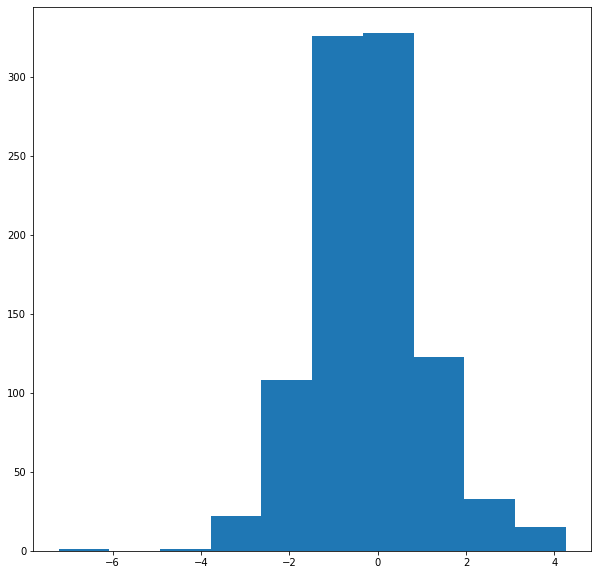

In [17]:
print(sub_freq_heatmap_df.max().max(), sub_freq_heatmap_df.min().min())
plt.figure(figsize=(10, 10))
plt.hist(sub_freq_heatmap_df.values.flatten())

In [18]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", xtickfontsize=16, ytickfontsize=16, cbarfontsize=16, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    data = data.copy()
    
    if "boundaries" in cbar_kw:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                for k in range(len(cbar_kw["boundaries"]) - 1):
                    lb, ub = cbar_kw["boundaries"][k], cbar_kw["boundaries"][k + 1]
                    if lb < data[i, j] < ub:
                        data[i, j] = lb + (ub - lb)/3

    
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, fontsize=cbarfontsize)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels, fontsize = xtickfontsize)
    ax.set_yticklabels(row_labels, fontsize = ytickfontsize)

    # Let the horizontal axes labeling appear on top.
#     ax.tick_params(top=True, bottom=False,
#                    labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 90, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
#     ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['right'].set_visible(False)

#     ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
#     ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

-5.95 4.261503793353113


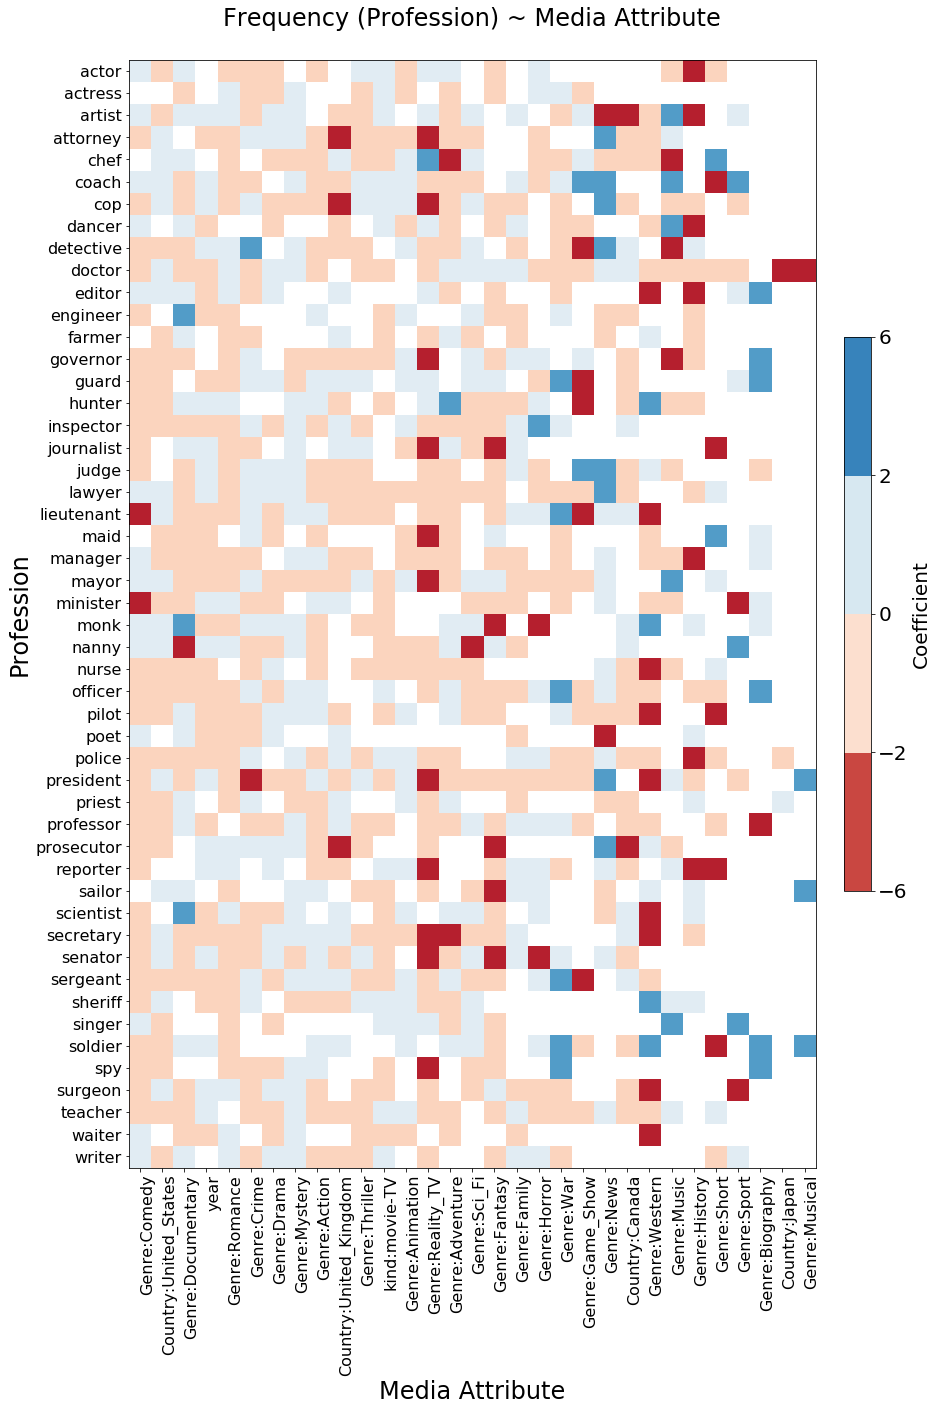

In [19]:
fig, ax = plt.subplots(figsize = (20, 20))
plt.rcParams.update({"font.size": 20})

data = sub_freq_heatmap_df.values.copy()

data[data <= -6] = -6 + 0.05
data[data >= +6] = +6 - 0.05

print(np.min(data[~np.isnan(data)]), np.max(data[~np.isnan(data)]))

im, cbar = heatmap(data, sub_freq_heatmap_df.index, sub_freq_heatmap_df.columns, ax=ax,
                   cmap="RdBu", cbarlabel="Coefficient", cbar_kw=dict(shrink=0.5, pad=0.02, boundaries=[-6,-2,0,2,6]), xtickfontsize=16, ytickfontsize=16, cbarfontsize=20, vmin=-6, vmax=6)

plt.xlabel("Media Attribute", fontsize=24)
plt.ylabel("Profession", fontsize=24)
plt.title("Frequency (Profession) ~ Media Attribute\n")

fig.tight_layout()
plt.savefig("../data/analysis_data/freq_heatmap.pdf", bbox_inches = 'tight', pad_inches = 0.1, format = "pdf", dpi = 300)

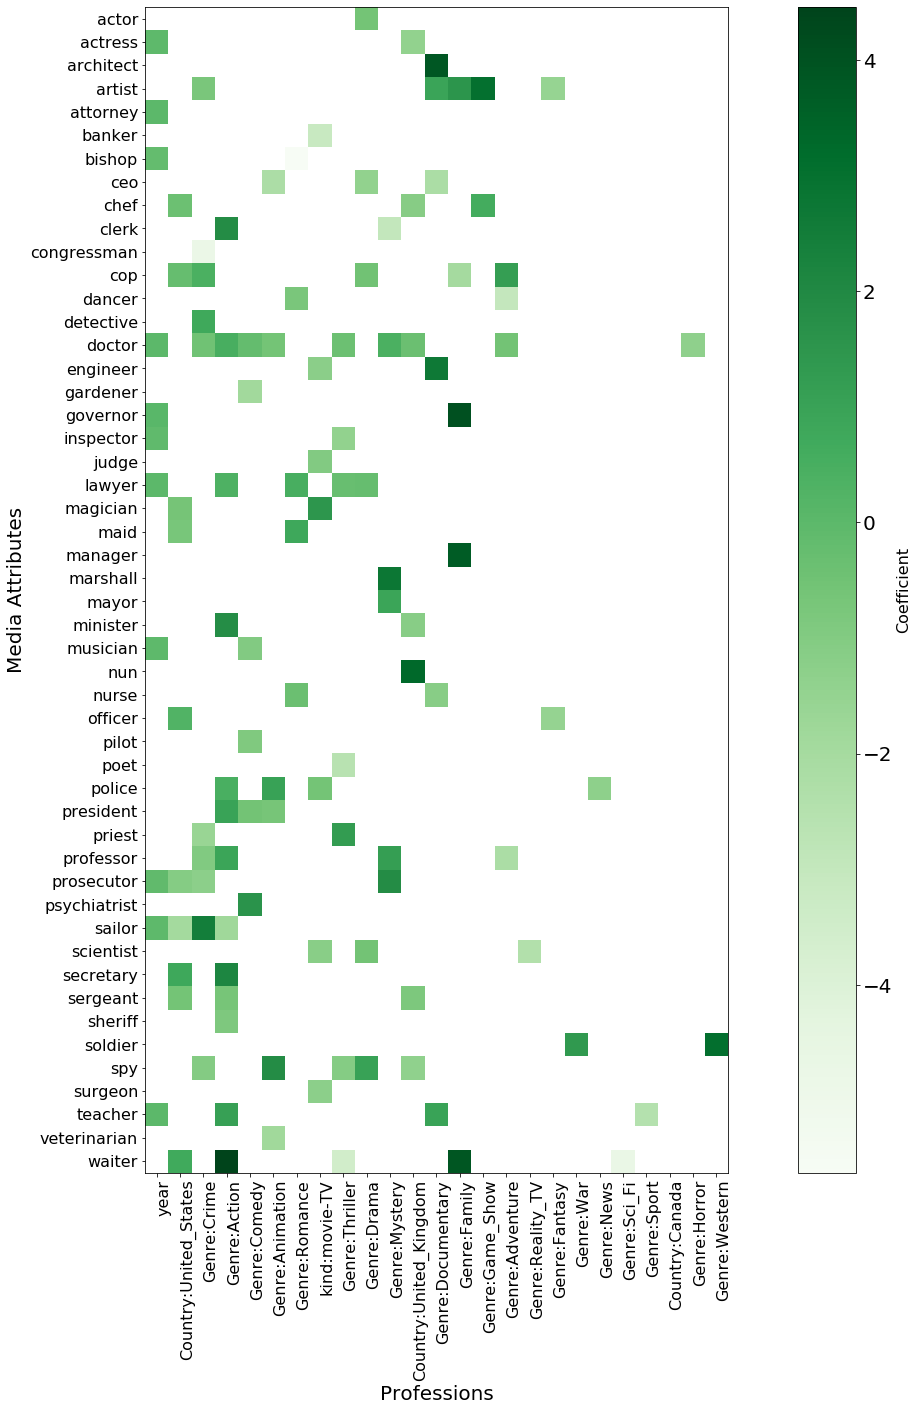

In [20]:
fig, ax = plt.subplots(figsize = (20, 20))
plt.rcParams.update({"font.size": 20})

im, cbar = heatmap(sub_sentiment_heatmap_df.values, sub_sentiment_heatmap_df.index, sub_sentiment_heatmap_df.columns, ax=ax,
                   cmap="Greens", cbarlabel="Coefficient")

plt.xlabel("Professions", fontsize=20)
plt.ylabel("Media Attributes", fontsize=20)

fig.tight_layout()
plt.savefig("../data/analysis_data/sentiment_heatmap.png", bbox_inches = 'tight', pad_inches = 0.1)

## Analyze SOC

23 32
20 27


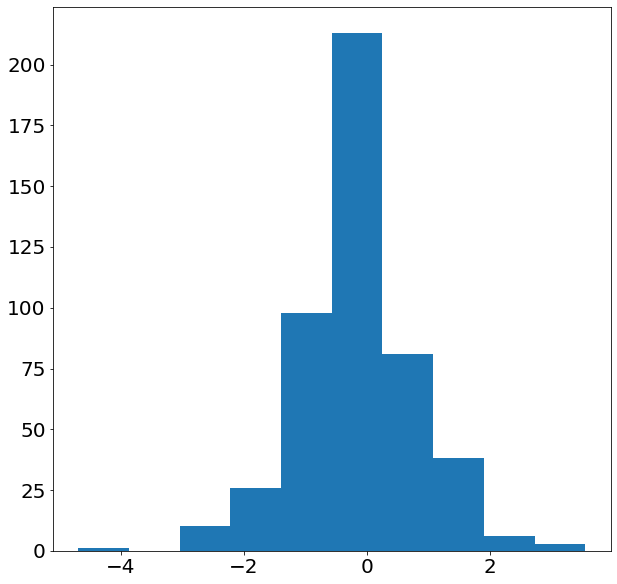

In [21]:
freq_soc_coefficients = set()
sentiment_soc_coefficients = set()

freq_soc_coeff_dfs = []
sentiment_soc_coeff_dfs = []

for i in range(23):
    soc_code = str(11 + 2*i)
    freq_path = os.path.join(soc_media_dir, soc_code + ".1.freq.coeff.csv")
    sentiment_path = os.path.join(soc_media_dir, soc_code + ".1.sentiment.coeff.csv")
    
    if os.path.exists(freq_path):
        freq_coeff_df = pd.read_csv(freq_path, index_col = 0)
        if not freq_coeff_df.empty:
            freq_coeff_df["soc"] = soc_code
            freq_soc_coeff_dfs.append(freq_coeff_df)
            freq_soc_coefficients.update(freq_coeff_df.index.tolist())
     
    if os.path.exists(sentiment_path):
        sentiment_coeff_df = pd.read_csv(sentiment_path, index_col = 0)
        if not sentiment_coeff_df.empty:
            sentiment_coeff_df["soc"] = soc_code
            sentiment_soc_coeff_dfs.append(sentiment_coeff_df)
            sentiment_soc_coefficients.update(sentiment_coeff_df.index.tolist())
        
print(len(freq_soc_coeff_dfs), len(freq_soc_coefficients))
print(len(sentiment_soc_coeff_dfs), len(sentiment_soc_coefficients))

freq_soc_heatmap_data = np.full((len(freq_soc_coeff_dfs), len(freq_soc_coefficients)), fill_value=np.nan)
freq_soc_coefficients = list(freq_soc_coefficients)
freq_index = np.full(len(freq_soc_coeff_dfs), fill_value="", dtype="<U100")

for i, freq_coeff_df in enumerate(freq_soc_coeff_dfs):
    for j, coeff in enumerate(freq_soc_coefficients):
        if coeff in freq_coeff_df.index:
            freq_soc_heatmap_data[i, j] = freq_coeff_df.loc[coeff, "coefficient"]
    freq_index[i] = freq_coeff_df["soc"].values[0]

freq_soc_heatmap_df = pd.DataFrame(freq_soc_heatmap_data, index = freq_index, columns = freq_soc_coefficients)
freq_soc_heatmap_df = freq_soc_heatmap_df.drop(columns = ["Intercept"])
freq_soc_heatmap_df.columns = [c.replace("Genre_", "Genre:").replace("Country_", "Country:").replace("kind[T.movie]","kind:movie-TV").replace("C(", "").replace(")[T.1]", "") for c in freq_soc_heatmap_df.columns]

freq_soc_heatmap_df = freq_soc_heatmap_df.T
freq_soc_heatmap_df["n_professions"] = freq_soc_heatmap_df.notna().sum(axis = 1)
freq_soc_heatmap_df = freq_soc_heatmap_df.sort_values(by = "n_professions", ascending = False)
freq_soc_heatmap_df = freq_soc_heatmap_df.drop(columns = ["n_professions"])

freq_soc_heatmap_df.columns = [
    "Management",
    "Business and Financial\nOperations",
    "Computer and\nMathematical",
    "Architecture and\nEngineering",
    "Life, Physical and\nSocial Science",
    "Community and Social\nService",
    "Legal",
    "Educational Instruction\nand Library",
    "Arts, Design, Entertainment,\n Sports, and Media",
    "Healthcare Practioners\nand Technical",
    "Healthcare Support",
    "Protective Service",
    "Food Preparation and\nServing",
    "Building and Grounds\nCleaning and Maintenance",
    "Personal Care and\nService",
    "Sales",
    "Office and Administrative\nSupport",
    "Farming, Fishing and\nForestry",
    "Construction and\nExtraction",
    "Installation, Maintenance,\n and Repair",
    "Production",
    "Transportation and Material\n Moving",
    "Military"
]

freq_soc_heatmap_df = freq_soc_heatmap_df.T

# freq_soc_heatmap_df

plt.figure(figsize = (10, 10))
plt.hist(freq_soc_heatmap_df.values.flatten())
plt.show()

In [22]:
sentiment_soc_heatmap_data = np.full((len(sentiment_soc_coeff_dfs), len(sentiment_soc_coefficients)), fill_value=np.nan)
sentiment_soc_coefficients = list(sentiment_soc_coefficients)
sentiment_index = np.full(len(sentiment_soc_coeff_dfs), fill_value="", dtype="<U100")

for i, sentiment_coeff_df in enumerate(sentiment_soc_coeff_dfs):
    for j, coeff in enumerate(sentiment_soc_coefficients):
        if coeff in sentiment_coeff_df.index:
            sentiment_soc_heatmap_data[i, j] = sentiment_coeff_df.loc[coeff, "coefficient"]
    sentiment_index[i] = sentiment_coeff_df["soc"].values[0]

sentiment_soc_heatmap_df = pd.DataFrame(sentiment_soc_heatmap_data, index = sentiment_index, columns = sentiment_soc_coefficients)
sentiment_soc_heatmap_df = sentiment_soc_heatmap_df.drop(columns = ["Intercept"])
sentiment_soc_heatmap_df.columns = [c.replace("Genre_", "Genre:").replace("Country_", "Country:").replace("kind[T.movie]","kind:movie-TV").replace("C(", "").replace(")[T.1]", "") for c in sentiment_soc_heatmap_df.columns]

sentiment_soc_heatmap_df = sentiment_soc_heatmap_df.T
sentiment_soc_heatmap_df["n_professions"] = sentiment_soc_heatmap_df.notna().sum(axis = 1)
sentiment_soc_heatmap_df = sentiment_soc_heatmap_df.sort_values(by = "n_professions", ascending = False)
sentiment_soc_heatmap_df = sentiment_soc_heatmap_df.drop(columns = ["n_professions"])

In [23]:
sentiment_soc_heatmap_df

,11,13,15,17,19,21,23,25,27,29,33,35,37,39,41,45,47,51,53,55
kind:movie-TV,-0.373072,NaN,NaN,-0.821074,-1.019682,NaN,-0.376167,0.346343,0.239139,-0.350126,-0.492700,NaN,NaN,NaN,-0.913154,NaN,-1.043820,NaN,NaN,NaN
Genre:Documentary,NaN,NaN,3.060802,2.290938,0.775719,0.638824,NaN,1.135505,0.499722,NaN,NaN,1.182371,1.483153,1.778877,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Crime,-0.706675,-0.735689,NaN,NaN,NaN,-1.156750,NaN,NaN,-0.462268,-0.434432,NaN,-0.481948,-1.522042,NaN,-1.046003,NaN,NaN,-0.986249,NaN,NaN
Genre:Comedy,-0.373989,NaN,NaN,0.929582,-0.410568,-0.351632,NaN,NaN,-0.219506,-0.252827,NaN,NaN,NaN,NaN,NaN,NaN,-0.706759,NaN,-0.690897,-0.330045
Genre:Action,0.604193,NaN,NaN,NaN,NaN,NaN,NaN,0.613340,NaN,0.584647,NaN,NaN,1.034040,NaN,NaN,-0.739615,NaN,1.613277,NaN,-0.266149
year,NaN,NaN,-0.161993,NaN,NaN,NaN,-0.015082,-0.022633,-0.008969,-0.015486,-0.013308,NaN,NaN,NaN,0.027590,NaN,NaN,NaN,NaN,NaN
Genre:Animation,-0.606990,NaN,NaN,NaN,NaN,NaN,NaN,-0.341187,-0.259207,-0.361122,NaN,0.547694,NaN,-0.592292,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Thriller,NaN,NaN,NaN,NaN,NaN,NaN,-0.225835,NaN,NaN,-0.248791,-0.231630,NaN,NaN,NaN,NaN,-0.730977,NaN,NaN,NaN,NaN
Genre:Mystery,NaN,NaN,NaN,NaN,NaN,0.703717,NaN,0.497548,NaN,NaN,0.492629,NaN,1.262725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country:United_States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.084199,NaN,-0.396716,NaN,NaN,NaN,NaN,NaN,NaN,0.189406


In [352]:
sentiment_soc_heatmap_df.columns = [
    "Management",
    "Business and Financial\nOperations",
    "Computer and\nMathematical",
    "Architecture and\nEngineering",
    "Life, Physical and\nSocial Science",
    "Community and Social\nService",
    "Legal",
    "Educational Instruction\nand Library",
    "Arts, Design, Entertainment,\n Sports, and Media",
    "Healthcare Practioners\nand Technical",
    "Protective Service",
    "Food Preparation and\nServing",
    "Building and Grounds\nCleaning and Maintenance",
    "Personal Care and\nService",
    "Sales",
    "Farming, Fishing and\nForestry",
    "Construction and\nExtraction",
    "Production",
    "Transportation and Material\n Moving",
    "Military"
]

sentiment_soc_heatmap_df = sentiment_soc_heatmap_df.T

-3.95 3.553526954559623


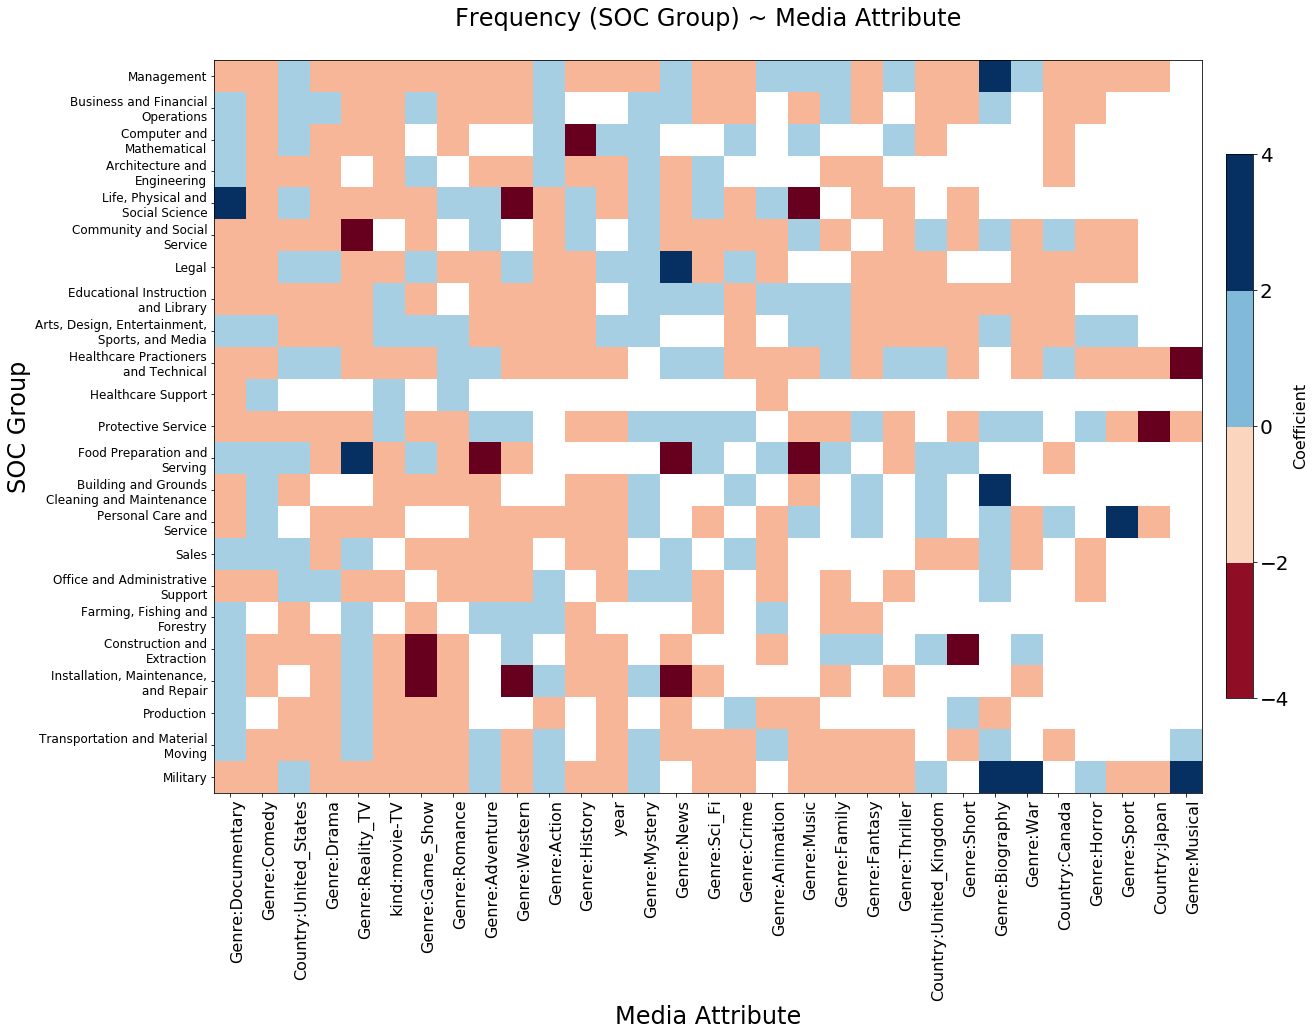

In [24]:
fig, ax = plt.subplots(figsize = (20, 20))
plt.rcParams.update({"font.size": 20})

data = freq_soc_heatmap_df.values.copy()

data[data <= -4] = -4 + 0.05
data[data >= +4] = +4 - 0.05

print(np.min(data[~np.isnan(data)]), np.max(data[~np.isnan(data)]))

im, cbar = heatmap(data, freq_soc_heatmap_df.index, freq_soc_heatmap_df.columns, ax=ax,
                   cmap="RdBu", cbarlabel="Coefficient", cbar_kw=dict(shrink=0.4, pad=0.02, boundaries = [-4, -2, 0, 2, 4]), ytickfontsize=12)

plt.xlabel("Media Attribute", fontsize=24)
plt.ylabel("SOC Group", fontsize=24)

plt.title("Frequency (SOC Group) ~ Media Attribute\n")

fig.tight_layout()
plt.savefig("../data/analysis_data/soc_freq_heatmap.pdf", bbox_inches = 'tight', pad_inches = 0.1, format = "pdf", dpi = 300)

## Sentiment Table

In [348]:
sentiment_heatmap_df

,doctor,police,captain,cop,officer,president,detective,teacher,lawyer,soldier,...,medical examiner,skater,school teacher,cab driver,comic,supermodel,publicist,golfer,bowler,basketball player
year,-0.015139,NaN,NaN,NaN,NaN,NaN,NaN,-0.027177,-0.012016,NaN,...,-0.303827,NaN,0.145195,-0.308893,-0.205482,NaN,NaN,NaN,NaN,NaN
Country:United_States,NaN,NaN,NaN,-0.233915,0.269021,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.549286,NaN,NaN,-2.45349,1.318623,NaN,5.125878,NaN
Genre:Crime,-0.493975,NaN,-0.892532,0.437612,NaN,NaN,0.753769,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.209325,NaN,NaN
Genre:Action,0.501461,0.454551,NaN,NaN,NaN,0.953808,NaN,1.100065,0.323172,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Comedy,-0.217435,NaN,NaN,NaN,NaN,-0.574435,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Thriller,-0.399476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.294274,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Romance,NaN,NaN,-0.931420,NaN,NaN,NaN,NaN,NaN,0.511135,NaN,...,NaN,-2.423247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.779111
kind:movie-TV,NaN,-0.601905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Animation,-0.594049,1.027665,NaN,NaN,NaN,-0.677121,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre:Drama,NaN,NaN,0.792652,-0.525011,NaN,NaN,NaN,NaN,-0.265206,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
sentiment_soc_heatmap_df

,kind:movie-TV,Genre:Comedy,Genre:Documentary,Genre:Crime,year,Genre:Action,Genre:Animation,Genre:Mystery,Genre:Thriller,Genre:Reality_TV,...,Genre:Family,Genre:News,Genre:Sci_Fi,Genre:Horror,Genre:Romance,Genre:History,Country:United_Kingdom,Genre:Fantasy,Genre:Music,Genre:Sport
Management,-0.373072,-0.373989,NaN,-0.706675,NaN,0.604193,-0.606990,NaN,NaN,NaN,...,NaN,NaN,-0.608835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business and Financial\nOperations,NaN,NaN,NaN,-0.735689,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.309595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Computer and\nMathematical,NaN,NaN,3.060802,NaN,-0.161993,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Architecture and\nEngineering,-0.821074,0.929582,2.290938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Life, Physical and\nSocial Science",-1.019682,-0.410568,0.775719,NaN,NaN,NaN,NaN,NaN,NaN,-1.340611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Community and Social\nService,NaN,-0.351632,0.638824,-1.156750,NaN,NaN,NaN,0.703717,NaN,NaN,...,-1.254796,NaN,NaN,NaN,NaN,-1.250185,NaN,NaN,NaN,NaN
Legal,-0.376167,NaN,NaN,NaN,-0.015082,NaN,NaN,NaN,-0.225835,NaN,...,NaN,NaN,NaN,NaN,0.379232,NaN,NaN,NaN,NaN,NaN
Educational Instruction\nand Library,0.346343,NaN,1.135505,NaN,-0.022633,0.613340,-0.341187,0.497548,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.531025
"Arts, Design, Entertainment,\n Sports, and Media",0.239139,-0.219506,0.499722,-0.462268,-0.008969,NaN,-0.259207,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.435641,NaN
Healthcare Practioners\nand Technical,-0.350126,-0.252827,NaN,-0.434432,-0.015486,0.584647,-0.361122,NaN,-0.248791,NaN,...,NaN,NaN,NaN,-0.764436,-0.114170,NaN,NaN,NaN,NaN,NaN


In [355]:
sentiment_heatmap_df.notna().sum().sum(), sentiment_soc_heatmap_df.notna().sum().sum()

(214, 101)

In [356]:
sentiment_heatmap_df = sentiment_heatmap_df.T

In [359]:
prof_values = []
soc_values = []

for prof, row in sentiment_heatmap_df.iterrows():
    for media_attr, value in row.items():
        if not np.isnan(value):
            prof_values.append((prof, media_attr, value))
            
for soc, row in sentiment_soc_heatmap_df.iterrows():
    for media_attr, value in row.items():
        if not np.isnan(value):
            soc_values.append((soc, media_attr, value))

In [365]:
prof_values = sorted(prof_values, key = lambda x: x[0])
soc_values = sorted(soc_values, key = lambda x: x[0])

In [367]:
len(set(value[0] for value in prof_values))

105

In [375]:
prof_values = sorted(prof_values, key = lambda x: x[0])

i = 0

while i < len(prof_values):
    positive_coefficients = []
    negative_coefficients = []
    profession = prof_values[i][0]
    
    j = i
    while j < len(prof_values) and prof_values[i][0] == prof_values[j][0]:
        if prof_values[j][1] != "year":
            if prof_values[j][2] > 0:
                positive_coefficients.append((prof_values[j][1], prof_values[j][2]))
            else:
                negative_coefficients.append((prof_values[j][1], prof_values[j][2]))
        j += 1
    i = j
    
    positive_coefficients = sorted(positive_coefficients, key = lambda x: x[1], reverse = True)
    negative_coefficients = sorted(negative_coefficients, key = lambda x: x[1])
    
    if len(positive_coefficients) > 0 and len(negative_coefficients) > 0:
        print("{} & {} & {} \\\\".format(profession, positive_coefficients[0][0].replace("_", " "), negative_coefficients[0][0].replace("_", " ")))
    
    elif len(positive_coefficients) > 0 and len(negative_coefficients) == 0:
        print("{} & {} & \\\\".format(profession, positive_coefficients[0][0].replace("_", " ")))
    
    elif len(positive_coefficients) == 0 and len(negative_coefficients) > 0:
        print("{} & & {} \\\\".format(profession, negative_coefficients[0][0].replace("_", " ")))

actor & & Genre:Drama \\
actress & & Country:United Kingdom \\
adviser & & Genre:Animation \\
ambassador & & Genre:Comedy \\
architect & Genre:Documentary & \\
artist & Genre:Game Show & Genre:Fantasy \\
author & & Genre:Animation \\
banker & & kind:movie-TV \\
basketball player & & Genre:Romance \\
bishop & & Genre:Romance \\
bowler & Country:United States & \\
boy scout & & Genre:Crime \\
captain & Genre:Mystery & Genre:Romance \\
carpenter & & kind:movie-TV \\
ceo & & Genre:Animation \\
chef & Genre:Game Show & Country:United Kingdom \\
chief of staff & & Genre:Comedy \\
cleaner & Genre:Action & Genre:Thriller \\
clerk & Genre:Action & Genre:Mystery \\
congressman & & Genre:Crime \\
contractor & Genre:Thriller & \\
cop & Genre:Adventure & Genre:Family \\
counsellor & Genre:Action & Genre:Romance \\
cowboy & & Country:United Kingdom \\
dancer & & Genre:Adventure \\
dealer & Country:United States & kind:movie-TV \\
detective & Genre:Crime & \\
director & Genre:Romance & Genre:Animatio

In [380]:
soc_values = sorted(soc_values, key = lambda x: x[0])

i = 0

while i < len(soc_values):
    positive_coefficients = []
    negative_coefficients = []
    soc = soc_values[i][0].replace("\n", " ")
    
    j = i
    while j < len(soc_values) and soc_values[i][0] == soc_values[j][0]:
        if soc_values[j][1] != "year":
            if soc_values[j][2] > 0:
                positive_coefficients.append((soc_values[j][1], soc_values[j][2]))
            else:
                negative_coefficients.append((soc_values[j][1], soc_values[j][2]))
        j += 1
    i = j
    
    positive_coefficients = sorted(positive_coefficients, key = lambda x: x[1], reverse = True)
    negative_coefficients = sorted(negative_coefficients, key = lambda x: x[1])
    
    if len(positive_coefficients) > 0 and len(negative_coefficients) > 0:
        print("{} & {} & {} \\\\".format(soc, positive_coefficients[0][0].replace("_", " "), negative_coefficients[0][0].replace("_", " ")))
    
    elif len(positive_coefficients) > 0 and len(negative_coefficients) == 0:
        print("{} & {} & \\\\".format(soc, positive_coefficients[0][0].replace("_", " ")))
    
    elif len(positive_coefficients) == 0 and len(negative_coefficients) > 0:
        print("{} & & {} \\\\".format(soc, negative_coefficients[0][0].replace("_", " ")))

Architecture and Engineering & Genre:Documentary & kind:movie-TV \\
Arts, Design, Entertainment,  Sports, and Media & Genre:Game Show & Genre:Crime \\
Building and Grounds Cleaning and Maintenance & Genre:Documentary & Genre:Crime \\
Business and Financial Operations & Genre:Adventure & Genre:News \\
Community and Social Service & Genre:Mystery & Genre:Family \\
Computer and Mathematical & Genre:Documentary & \\
Construction and Extraction & & Genre:Sci Fi \\
Educational Instruction and Library & Genre:Documentary & Genre:Sport \\
Farming, Fishing and Forestry & & Genre:Western \\
Food Preparation and Serving & Genre:Documentary & Genre:Crime \\
Healthcare Practioners and Technical & Genre:Action & Genre:Horror \\
Legal & Genre:Romance & kind:movie-TV \\
Life, Physical and Social Science & Genre:Documentary & Genre:Reality TV \\
Management & Genre:War & Genre:Crime \\
Military & Genre:Western & Genre:Comedy \\
Personal Care and Service & Genre:Documentary & Genre:Animation \\
Productio

## Employment

In [381]:
emp_df = pd.read_csv("../data/employment/emp.csv", index_col=0)

In [382]:
emp_df.shape

(22, 20)

In [383]:
emp_df

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
mcode,,,,,,,,,,,,,,,,,,,,
11,8063410,7782680,7212360,7092460,6653480,6200940,5960560,5892900,6003930,6152650,6116380,6022860,6183820,6390430,6542950,6741640,6936990,7090790,7280330,7616650
13,4361980,4619270,4676680,4772120,4924210,5131840,5410410,5826140,6015500,6135520,6063670,6090910,6178070,6419370,6658090,6828940,7032560,7281190,7472750,7721300
15,2620080,2932810,2825870,2772620,2827010,2915300,2952740,3076200,3191360,3308260,3303690,3283950,3406720,3578220,3696180,3834180,4005250,4165140,4261460,4384300
17,2506380,2575620,2489070,2411260,2376650,2372770,2382480,2430250,2486020,2521630,2412730,2305530,2310830,2356530,2380840,2418020,2475390,2499050,2516780,2556220
19,909530,1038670,1067730,1078630,1113130,1131390,1185730,1231070,1255670,1296840,1308380,1064510,1082370,1104100,1135030,1144440,1146110,1152840,1148300,1171910
21,1404540,1469000,1523890,1576980,1615610,1673740,1692950,1749210,1793040,1861750,1891320,1901180,1890410,1882080,1901730,1930750,1972140,2019250,2096740,2171820
23,858320,890910,909370,934850,951510,958520,986740,976740,998590,1003270,999020,992650,1002330,1023020,1041700,1052900,1062370,1075520,1095770,1127900
25,7344830,7450860,7658480,7772470,7831630,7891810,8078500,8206440,8316360,8451250,8488740,8457870,8409060,8374910,8400640,8435780,8542670,8636430,8727710,8779780
27,1551600,1513420,1508790,1503680,1538150,1595710,1683310,1727380,1761270,1804940,1745670,1716640,1725670,1750130,1758310,1793700,1843600,1902970,1925140,1951170


In [398]:
emp_prop_df = emp_df/emp_df.sum()
emp_prop_df

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
mcode,,,,,,,,,,,,,,,,,,,,
11,0.063355,0.059987,0.056355,0.055617,0.052156,0.048397,0.045742,0.044440,0.044687,0.045513,0.046816,0.047388,0.048206,0.049049,0.049348,0.049891,0.050306,0.050504,0.051072,0.052625
13,0.034272,0.035604,0.036542,0.037421,0.038601,0.040053,0.041520,0.043936,0.044773,0.045386,0.046412,0.047923,0.048161,0.049271,0.050216,0.050537,0.050999,0.051860,0.052422,0.053348
15,0.020586,0.022605,0.022080,0.021742,0.022161,0.022753,0.022660,0.023198,0.023753,0.024472,0.025287,0.025838,0.026557,0.027464,0.027877,0.028374,0.029045,0.029666,0.029895,0.030292
17,0.019693,0.019852,0.019449,0.018908,0.018630,0.018519,0.018283,0.018327,0.018503,0.018653,0.018467,0.018140,0.018014,0.018087,0.017957,0.017894,0.017951,0.017799,0.017656,0.017662
19,0.007146,0.008006,0.008343,0.008458,0.008726,0.008830,0.009099,0.009284,0.009346,0.009593,0.010015,0.008376,0.008438,0.008474,0.008561,0.008469,0.008311,0.008211,0.008055,0.008097
21,0.011036,0.011323,0.011907,0.012366,0.012665,0.013063,0.012992,0.013191,0.013346,0.013772,0.014476,0.014958,0.014737,0.014446,0.014343,0.014288,0.014302,0.014382,0.014709,0.015006
23,0.006744,0.006867,0.007106,0.007331,0.007459,0.007481,0.007572,0.007366,0.007433,0.007421,0.007647,0.007810,0.007814,0.007852,0.007857,0.007792,0.007704,0.007660,0.007687,0.007793
25,0.057709,0.057430,0.059841,0.060949,0.061392,0.061593,0.061995,0.061886,0.061899,0.062516,0.064974,0.066546,0.065553,0.064280,0.063359,0.062428,0.061950,0.061513,0.061226,0.060662
27,0.012191,0.011665,0.011789,0.011791,0.012057,0.012454,0.012918,0.013027,0.013109,0.013352,0.013362,0.013507,0.013453,0.013433,0.013261,0.013274,0.013369,0.013554,0.013505,0.013481


In [399]:
emp_prop_df.sum()

1999    1.0
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
dtype: float64

In [384]:
soc_df = pd.read_csv("../data/analysis_data/soc_frequency.csv", index_col=0)

In [385]:
soc_df

,soc_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
soc_code,,,,,,,,,,,,,,,,,,,,,
11,Management,0.000416,4.412259e-04,5.852006e-04,4.091884e-04,5.436580e-04,0.000548,5.693715e-04,0.000561,5.575719e-04,...,0.000378,0.000436,0.000433,0.000387,0.000396,4.049724e-04,0.000385,0.000405,4.441448e-04,4.360381e-04
13,Business and Financial Operations,0.000054,4.611272e-05,3.741692e-05,5.316989e-05,4.016717e-05,0.000038,6.842440e-05,0.000046,5.659758e-05,...,0.000044,0.000050,0.000058,0.000052,0.000048,4.765027e-05,0.000048,0.000045,5.095036e-05,4.489468e-05
15,Computer and Mathematical,0.000000,9.707941e-07,9.977844e-07,9.846275e-07,1.401180e-06,0.000000,7.054062e-07,0.000001,9.814609e-07,...,0.000010,0.000004,0.000004,0.000005,0.000007,8.269345e-06,0.000008,0.000012,1.157883e-05,7.938617e-06
17,Architecture and Engineering,0.000016,3.203621e-05,2.644129e-05,3.052345e-05,2.241889e-05,0.000035,3.421220e-05,0.000045,2.748090e-05,...,0.000029,0.000023,0.000025,0.000021,0.000021,1.991580e-05,0.000022,0.000022,2.504551e-05,3.235740e-05
19,"Life, Physical, and Social Science",0.000048,3.349240e-05,1.845901e-05,3.495428e-05,3.129303e-05,0.000022,2.927436e-05,0.000036,2.224645e-05,...,0.000091,0.000086,0.000082,0.000065,0.000061,6.111648e-05,0.000067,0.000056,5.899090e-05,5.543633e-05
21,Community and Social Service,0.000173,2.246988e-04,1.471732e-04,1.768536e-04,2.330630e-04,0.000227,1.495461e-04,0.000157,1.747511e-04,...,0.000148,0.000147,0.000140,0.000131,0.000138,1.393368e-04,0.000148,0.000141,1.431005e-04,1.377357e-04
23,Legal,0.000248,2.359537e-04,2.468621e-04,2.555790e-04,2.092153e-04,0.000148,1.487128e-04,0.000221,2.436307e-04,...,0.000184,0.000192,0.000188,0.000211,0.000216,1.892269e-04,0.000208,0.000198,1.954679e-04,2.045878e-04
25,Educational Instruction and Library,0.000143,2.543481e-04,1.147452e-04,1.590173e-04,2.568831e-04,0.000147,1.456664e-04,0.000215,1.439476e-04,...,0.000141,0.000130,0.000143,0.000136,0.000150,1.361065e-04,0.000132,0.000118,1.183054e-04,1.041734e-04
27,"Arts, Design, Entertainment, Sports, and Media",0.000421,4.241228e-04,4.589808e-04,3.722649e-04,4.310640e-04,0.000352,3.941868e-04,0.000372,3.542355e-04,...,0.000434,0.000453,0.000445,0.000449,0.000456,4.355932e-04,0.000409,0.000410,4.006259e-04,3.509781e-04


In [403]:
records = []

for soc_code in range(11, 54, 2):
#     emp = emp_df.loc[soc_code, np.arange(1999, 2018).astype(str)].values
    emp = emp_prop_df.loc[soc_code, np.arange(1999, 2018).astype(str)].values
    freq = soc_df.loc[soc_code, np.arange(1999, 2018).astype(str)].values
    soc_name = soc_df.loc[soc_code, "soc_name"]
    result = spearmanr(emp, freq)
    corr, pvalue = result.correlation, result.pvalue
    
    if pvalue < 0.05:
        if corr > 0:
            print(soc_name, "+")
        else:
            print(soc_name, "-")
    else:
        print(soc_name, "0")

#     if corr > 0:
#         print(soc_name, "+")
#     else:
#         print(soc_name, "-")

    records.append((soc_name, corr, pvalue))
    
records = sorted(records, key = lambda x: x[1], reverse = True)

Management 0
Business and Financial Operations 0
Computer and Mathematical +
Architecture and Engineering 0
Life, Physical, and Social Science 0
Community and Social Service -
Legal 0
Educational Instruction and Library 0
Arts, Design, Entertainment, Sports, and Media 0
Healthcare Practitioners and Technical Occupations -
Healthcare Support 0
Protective Service 0
Food Preparation and Serving Related Occupations +
Building and Grounds Cleaning and Maintenance +
Personal Care and Service 0
Sales and Related Occupations 0
Office and Administrative Support +
Farming, Fishing, and Forestry 0
Construction and Extraction 0
Installation, Maintenance, and Repair 0
Production +
Transportation and Material Moving +


In [402]:
for record in records:
    print(record)

('Office and Administrative Support', 0.9578947368421052, 1.2135311926058017e-10)
('Transportation and Material Moving', 0.7210526315789473, 0.0004947294682852213)
('Building and Grounds Cleaning and Maintenance', 0.712280701754386, 0.0006226087633379054)
('Food Preparation and Serving Related Occupations', 0.6736842105263158, 0.001565449761605664)
('Computer and Mathematical', 0.5877192982456141, 0.008139305847095202)
('Production', 0.5350877192982456, 0.01823909654575659)
('Installation, Maintenance, and Repair', 0.44912280701754387, 0.053731734799895854)
('Construction and Extraction', 0.431578947368421, 0.06502990156827808)
('Sales and Related Occupations', 0.419298245614035, 0.07393698475441418)
('Life, Physical, and Social Science', 0.41052631578947374, 0.08083220853041033)
('Management', 0.26666666666666666, 0.26976816493501343)
('Business and Financial Operations', 0.24035087719298245, 0.32160243714265613)
('Architecture and Engineering', 0.08070175438596491, 0.7425898686237979

In [417]:
(104/54)*len("Office and Administrative Support Occupations")

86.66666666666666

## Frequency

In [422]:
sub_freq_heatmap_df

,Genre:Comedy,Country:United_States,Genre:Documentary,year,Genre:Romance,Genre:Crime,Genre:Drama,Genre:Mystery,Genre:Action,Country:United_Kingdom,...,Genre:News,Country:Canada,Genre:Western,Genre:Music,Genre:History,Genre:Short,Genre:Sport,Genre:Biography,Country:Japan,Genre:Musical
actor,0.955244,-0.295630,0.881663,NaN,-0.211463,-0.458466,-0.128505,NaN,-0.482085,NaN,...,NaN,NaN,NaN,-1.499142,-2.438516,-1.414240,NaN,NaN,NaN,NaN
actress,NaN,NaN,-0.914638,NaN,0.189106,-1.279608,-0.484801,0.929907,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist,0.173377,-0.230983,1.189604,0.006196,0.148235,-0.277642,0.111391,0.743058,NaN,-0.412563,...,-3.009424,-2.325027,-0.928402,2.164333,-2.134108,NaN,0.968962,NaN,NaN,NaN
attorney,-0.387117,0.367227,NaN,-0.006756,-0.654759,0.712463,0.878239,0.761389,-0.637923,-2.984104,...,2.268879,-1.690908,-1.329302,0.810695,NaN,NaN,NaN,NaN,NaN,NaN
chef,NaN,1.812591,1.449416,NaN,-0.095566,NaN,-0.389525,-0.261391,-0.434787,0.609969,...,-1.979507,-1.283766,-1.895435,-7.223264,NaN,2.726687,NaN,NaN,NaN,NaN
coach,0.322754,0.151215,-1.379616,0.043301,-0.178009,-0.580675,NaN,0.420653,-0.336515,-1.550272,...,3.138695,NaN,NaN,2.903857,NaN,-2.551653,2.854622,NaN,NaN,NaN
cop,-0.421657,0.031868,-1.517315,0.018811,-0.134166,1.357985,-0.236936,-0.213112,-0.136137,-2.004509,...,2.503162,-0.324106,NaN,-1.386074,-1.876601,NaN,-0.976911,NaN,NaN,NaN
dancer,0.427727,NaN,0.331069,-0.012035,NaN,NaN,-0.254877,NaN,NaN,-0.367133,...,NaN,NaN,-1.635018,2.990479,-2.222224,NaN,NaN,NaN,NaN,NaN
detective,-0.807069,-0.045700,-0.756502,0.014690,0.174415,2.070738,NaN,0.591755,-0.555949,-0.785459,...,2.441959,0.602230,NaN,-2.357666,0.911231,NaN,NaN,NaN,NaN,NaN
doctor,-0.436178,0.208625,-0.421560,-0.014864,0.368767,-0.488853,0.564616,0.265251,-0.616141,NaN,...,0.442571,0.567408,-1.090819,-1.427858,-1.507081,-0.339783,-1.775791,NaN,-2.288207,-3.150963


In [427]:
def print_predictors(profession):
    srs = sub_freq_heatmap_df.loc[profession]
    positive = srs.index[srs > 0]
    negative = srs.index[srs < 0]
    print(sorted(positive))
    print(sorted(negative))

In [446]:
def compare_predictors(profession1, profession2):
    srs1 = sub_freq_heatmap_df.loc[profession1]
    srs2 = sub_freq_heatmap_df.loc[profession2]
    pos1 = srs1.index[srs1 > 0]
    pos2 = srs2.index[srs2 > 0]
    neg1 = srs1.index[srs1 < 0]
    neg2 = srs2.index[srs2 < 0]
    pos1pos2 = sorted(set(pos1).intersection(pos2))
    neg1neg2 = sorted(set(neg1).intersection(neg2))
    pos1neg2 = sorted(set(pos1).intersection(neg2))
    pos2neg1 = sorted(set(pos2).intersection(neg1))
    print("+{} +{}: {}".format(profession1, profession2, pos1pos2))
    print("-{} -{}: {}".format(profession1, profession2, neg1neg2))
    print("+{} -{}: {}".format(profession1, profession2, pos1neg2))
    print("-{} +{}: {}".format(profession1, profession2, pos2neg1))

In [428]:
print_predictors("actor")

['Genre:Adventure', 'Genre:Comedy', 'Genre:Documentary', 'Genre:Horror', 'Genre:Reality_TV', 'Genre:Thriller', 'kind:movie-TV']
['Country:United_States', 'Genre:Action', 'Genre:Animation', 'Genre:Crime', 'Genre:Drama', 'Genre:Fantasy', 'Genre:History', 'Genre:Music', 'Genre:Romance', 'Genre:Short']


In [429]:
print_predictors("actress")

['Genre:Horror', 'Genre:Mystery', 'Genre:Romance', 'Genre:War', 'kind:movie-TV']
['Genre:Adventure', 'Genre:Animation', 'Genre:Crime', 'Genre:Documentary', 'Genre:Drama', 'Genre:Fantasy', 'Genre:Game_Show', 'Genre:Thriller']


In [431]:
print_predictors("artist")

['Genre:Comedy', 'Genre:Documentary', 'Genre:Drama', 'Genre:Family', 'Genre:Game_Show', 'Genre:Music', 'Genre:Mystery', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sci_Fi', 'Genre:Sport', 'kind:movie-TV', 'year']
['Country:Canada', 'Country:United_Kingdom', 'Country:United_States', 'Genre:Adventure', 'Genre:Crime', 'Genre:History', 'Genre:News', 'Genre:Thriller', 'Genre:War', 'Genre:Western']


In [430]:
print_predictors("attorney")

['Country:United_States', 'Genre:Crime', 'Genre:Drama', 'Genre:Music', 'Genre:Mystery', 'Genre:News']
['Country:Canada', 'Country:United_Kingdom', 'Genre:Action', 'Genre:Adventure', 'Genre:Animation', 'Genre:Comedy', 'Genre:Horror', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sci_Fi', 'Genre:Thriller', 'Genre:Western', 'kind:movie-TV', 'year']


In [434]:
compare_predictors("actor", "actress")

+actor -actress: ['Genre:Adventure', 'Genre:Documentary', 'Genre:Thriller']
-actor +actress: ['Genre:Romance']


In [442]:
print_predictors("lawyer")

['Country:United_States', 'Genre:Comedy', 'Genre:Crime', 'Genre:Drama', 'Genre:Mystery', 'Genre:News', 'Genre:Short', 'year']
['Country:Canada', 'Country:United_Kingdom', 'Genre:Action', 'Genre:Adventure', 'Genre:Animation', 'Genre:Documentary', 'Genre:Fantasy', 'Genre:Game_Show', 'Genre:History', 'Genre:Horror', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sci_Fi', 'Genre:Thriller', 'Genre:War', 'kind:movie-TV']


In [447]:
compare_predictors("lawyer", "prosecutor")
print()
compare_predictors("lawyer", "judge")
print()
compare_predictors("attorney", "prosecutor")
print()
compare_predictors("lawyer", "attorney")

+lawyer +prosecutor: ['Genre:Crime', 'Genre:Drama', 'Genre:Mystery', 'Genre:News', 'year']
-lawyer -prosecutor: ['Country:Canada', 'Country:United_Kingdom', 'Genre:Action', 'Genre:Fantasy', 'Genre:Reality_TV', 'Genre:Thriller']
+lawyer -prosecutor: ['Country:United_States', 'Genre:Comedy']
-lawyer +prosecutor: ['Genre:Romance']

+lawyer +judge: ['Genre:Crime', 'Genre:Drama', 'Genre:Mystery', 'Genre:News', 'year']
-lawyer -judge: ['Country:Canada', 'Country:United_Kingdom', 'Genre:Action', 'Genre:Adventure', 'Genre:Documentary', 'Genre:Fantasy', 'Genre:Horror', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Thriller']
+lawyer -judge: ['Genre:Comedy']
-lawyer +judge: ['Genre:Game_Show']

+attorney +prosecutor: ['Genre:Crime', 'Genre:Drama', 'Genre:Mystery', 'Genre:News']
-attorney -prosecutor: ['Country:Canada', 'Country:United_Kingdom', 'Genre:Action', 'Genre:Comedy', 'Genre:Reality_TV', 'Genre:Thriller']
+attorney -prosecutor: ['Country:United_States', 'Genre:Music']
-attorney +prosecutor

In [443]:
print_predictors("cop")

['Country:United_States', 'Genre:Animation', 'Genre:Crime', 'Genre:News', 'Genre:Sci_Fi', 'Genre:Thriller', 'kind:movie-TV', 'year']
['Country:Canada', 'Country:United_Kingdom', 'Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Documentary', 'Genre:Drama', 'Genre:Family', 'Genre:Fantasy', 'Genre:History', 'Genre:Music', 'Genre:Mystery', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sport', 'Genre:War']


In [444]:
print_predictors("detective")

['Country:Canada', 'Genre:Animation', 'Genre:Crime', 'Genre:History', 'Genre:Mystery', 'Genre:News', 'Genre:Romance', 'Genre:Sci_Fi', 'year']
['Country:United_Kingdom', 'Country:United_States', 'Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Documentary', 'Genre:Family', 'Genre:Game_Show', 'Genre:Music', 'Genre:Reality_TV', 'Genre:Thriller', 'Genre:War']


In [445]:
print_predictors("spy")

['Genre:Action', 'Genre:Biography', 'Genre:Mystery', 'Genre:War']
['Country:United_States', 'Genre:Comedy', 'Genre:Crime', 'Genre:Drama', 'Genre:Fantasy', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sci_Fi', 'kind:movie-TV']


In [448]:
compare_predictors("cop", "police")
print()
compare_predictors("cop", "detective")
print()
compare_predictors("detective", "spy")

+cop +police: ['Genre:Animation', 'Genre:Crime', 'Genre:News', 'kind:movie-TV']
-cop -police: ['Country:Canada', 'Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Documentary', 'Genre:History', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:War']
+cop -police: ['Country:United_States', 'Genre:Thriller', 'year']
-cop +police: ['Country:United_Kingdom', 'Genre:Family', 'Genre:Mystery']

+cop +detective: ['Genre:Animation', 'Genre:Crime', 'Genre:News', 'Genre:Sci_Fi', 'year']
-cop -detective: ['Country:United_Kingdom', 'Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Documentary', 'Genre:Family', 'Genre:Music', 'Genre:Reality_TV', 'Genre:War']
+cop -detective: ['Country:United_States', 'Genre:Thriller']
-cop +detective: ['Country:Canada', 'Genre:History', 'Genre:Mystery', 'Genre:Romance']

+detective +spy: ['Genre:Mystery']
-detective -spy: ['Country:United_States', 'Genre:Comedy', 'Genre:Reality_TV']
+detective -spy: ['Genre:Crime', 'Genre:Romance', 'Genre:Sci_Fi']
-detecti

In [449]:
print_predictors("sheriff")

['Country:United_States', 'Genre:Animation', 'Genre:Crime', 'Genre:History', 'Genre:Music', 'Genre:Sci_Fi', 'Genre:Thriller', 'Genre:Western', 'kind:movie-TV']
['Country:United_Kingdom', 'Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Mystery', 'Genre:Reality_TV', 'Genre:Romance', 'year']


In [450]:
compare_predictors("sheriff", "inspector")

+sheriff +inspector: ['Genre:Animation', 'Genre:Crime']
-sheriff -inspector: ['Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Reality_TV', 'Genre:Romance', 'year']
+sheriff -inspector: ['Country:United_States', 'Genre:Sci_Fi', 'Genre:Thriller']
-sheriff +inspector: ['Country:United_Kingdom', 'Genre:Mystery']


In [451]:
compare_predictors("dancer", "singer")

+dancer +singer: ['Genre:Comedy', 'Genre:Music', 'Genre:Reality_TV', 'kind:movie-TV']
-dancer -singer: ['Genre:Adventure', 'Genre:Drama', 'Genre:Fantasy']
+dancer -singer: []
-dancer +singer: ['Genre:Animation']


In [452]:
compare_predictors("dancer", "artist")

+dancer +artist: ['Genre:Comedy', 'Genre:Documentary', 'Genre:Family', 'Genre:Music', 'Genre:Reality_TV', 'kind:movie-TV']
-dancer -artist: ['Country:United_Kingdom', 'Genre:Adventure', 'Genre:History', 'Genre:War', 'Genre:Western']
+dancer -artist: []
-dancer +artist: ['Genre:Drama', 'Genre:Game_Show', 'year']


In [453]:
compare_predictors("doctor", "nurse")

+doctor +nurse: ['Genre:Drama', 'Genre:News']
-doctor -nurse: ['Genre:Action', 'Genre:Comedy', 'Genre:Crime', 'Genre:Documentary', 'Genre:Music', 'Genre:Reality_TV', 'Genre:Thriller', 'Genre:Western', 'kind:movie-TV', 'year']
+doctor -nurse: ['Country:Canada', 'Country:United_States', 'Genre:Adventure', 'Genre:Sci_Fi']
-doctor +nurse: ['Genre:Short']


In [454]:
compare_predictors("doctor", "surgeon")

+doctor +surgeon: ['Country:United_States', 'Genre:Drama', 'Genre:Fantasy', 'Genre:Mystery', 'Genre:Romance']
-doctor -surgeon: ['Genre:Action', 'Genre:Comedy', 'Genre:Crime', 'Genre:Documentary', 'Genre:Horror', 'Genre:Reality_TV', 'Genre:Sport', 'Genre:Thriller', 'Genre:War', 'Genre:Western', 'kind:movie-TV']
+doctor -surgeon: ['Country:Canada', 'Genre:Family', 'Genre:Sci_Fi']
-doctor +surgeon: ['year']


In [455]:
compare_predictors("journalist", "reporter")

+journalist +reporter: ['Genre:Family', 'year']
-journalist -reporter: ['Genre:Comedy', 'Genre:Fantasy', 'Genre:Reality_TV', 'Genre:Short']
+journalist -reporter: ['Country:United_Kingdom']
-journalist +reporter: ['Genre:Animation', 'Genre:Romance']


In [456]:
compare_predictors("journalist", "editor")

+journalist +editor: ['Country:United_Kingdom', 'Genre:Documentary']
-journalist -editor: ['Genre:Crime', 'Genre:Fantasy']
+journalist -editor: ['Genre:Adventure', 'year']
-journalist +editor: ['Genre:Comedy', 'Genre:Reality_TV', 'Genre:Romance']


In [457]:
compare_predictors("engineer", "scientist")

+engineer +scientist: ['Genre:Animation', 'Genre:Documentary', 'Genre:Sci_Fi']
-engineer -scientist: ['Genre:Comedy', 'Genre:Fantasy', 'Genre:News', 'kind:movie-TV', 'year']
+engineer -scientist: []
-engineer +scientist: ['Country:Canada', 'Genre:History', 'Genre:Romance']


In [458]:
compare_predictors("professor", "teacher")

+professor +teacher: ['Genre:Family', 'Genre:Mystery']
-professor -teacher: ['Country:Canada', 'Country:United_States', 'Genre:Action', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Crime', 'Genre:Drama', 'Genre:Fantasy', 'Genre:Game_Show', 'Genre:Reality_TV', 'Genre:Thriller', 'Genre:Western']
+professor -teacher: ['Country:United_Kingdom', 'Genre:Documentary', 'Genre:Horror', 'Genre:War']
-professor +teacher: ['Genre:Short', 'kind:movie-TV', 'year']


In [459]:
compare_predictors("farmer", "hunter")

+farmer +hunter: ['Genre:Adventure', 'Genre:Documentary', 'Genre:Western']
-farmer -hunter: ['Country:United_States', 'Genre:Family', 'Genre:History', 'Genre:Sci_Fi', 'kind:movie-TV']
+farmer -hunter: ['Country:United_Kingdom']
-farmer +hunter: ['Genre:Reality_TV', 'Genre:Romance']


In [462]:
compare_predictors("governor", "mayor")
print()
compare_predictors("mayor", "senator")
print()
compare_predictors("senator", "president")

+governor +mayor: ['Genre:Animation', 'Genre:Crime', 'Genre:Sci_Fi']
-governor -mayor: ['Country:United_Kingdom', 'Genre:Action', 'Genre:Documentary', 'Genre:Mystery', 'Genre:Reality_TV', 'Genre:Romance', 'kind:movie-TV']
+governor -mayor: ['Genre:Family', 'Genre:Game_Show', 'Genre:Horror']
-governor +mayor: ['Country:United_States', 'Genre:Comedy', 'Genre:Fantasy', 'Genre:Music', 'Genre:Thriller']

+mayor +senator: ['Country:United_States', 'Genre:News', 'Genre:Sci_Fi', 'Genre:Thriller']
-mayor -senator: ['Country:United_Kingdom', 'Genre:Adventure', 'Genre:Documentary', 'Genre:Horror', 'Genre:Mystery', 'Genre:Reality_TV', 'Genre:Romance', 'kind:movie-TV']
+mayor -senator: ['Genre:Comedy', 'Genre:Crime', 'Genre:Fantasy']
-mayor +senator: ['Genre:Action', 'Genre:Drama', 'Genre:Family', 'Genre:War', 'year']

+senator +president: ['Country:United_States', 'Genre:Action', 'Genre:News', 'Genre:Thriller', 'year']
-senator -president: ['Country:United_Kingdom', 'Genre:Adventure', 'Genre:Comed

In [464]:
sub_freq_heatmap_df[sub_freq_heatmap_df["Genre:Drama"] > 0].index

Index(['artist', 'attorney', 'doctor', 'editor', 'guard', 'judge', 'lawyer',
       'monk', 'nurse', 'pilot', 'poet', 'prosecutor', 'reporter', 'secretary',
       'senator', 'surgeon', 'writer'],
      dtype='object')

In [465]:
compare_predictors("lieutenant", "soldier")

+lieutenant +soldier: ['Genre:Action', 'Genre:Horror', 'Genre:War']
-lieutenant -soldier: ['Genre:Comedy', 'Genre:Fantasy', 'Genre:Game_Show', 'Genre:Romance']
+lieutenant -soldier: ['Country:Canada', 'Country:United_States']
-lieutenant +soldier: ['Country:United_Kingdom', 'Genre:Adventure', 'Genre:Documentary', 'Genre:Western', 'year']


In [466]:
compare_predictors("monk", "priest")

+monk +priest: ['Genre:Adventure', 'Genre:Crime', 'Genre:Documentary', 'Genre:History']
-monk -priest: ['Genre:Action', 'Genre:Romance']
+monk -priest: ['Country:Canada', 'Country:United_States', 'Genre:Comedy', 'Genre:Mystery']
-monk +priest: []


In [467]:
freq_soc_heatmap_df

,Genre:Documentary,Genre:Comedy,Genre:Drama,Country:United_States,kind:movie-TV,Genre:Reality_TV,Genre:Game_Show,Genre:Romance,Genre:Western,Genre:Adventure,...,Country:United_Kingdom,Genre:Thriller,Genre:Biography,Genre:Short,Genre:War,Country:Canada,Genre:Horror,Genre:Sport,Country:Japan,Genre:Musical
Management,-0.470112,-0.771195,-0.047236,0.281608,-0.704481,-1.806311,-0.457646,-0.719533,-1.473766,-0.259262,...,-0.265528,0.035345,2.386460,-1.130556,1.320094,-0.103976,-0.597205,-1.341536,-1.590145,NaN
Business and Financial\nOperations,0.392182,-0.336980,0.279551,0.068071,-0.453498,-0.494354,0.721769,-0.356970,-0.794331,-0.839430,...,-0.344159,NaN,1.614554,-1.321439,NaN,-0.722515,-0.703792,NaN,NaN,NaN
Computer and\nMathematical,1.659777,-0.792046,-0.567346,0.654922,-0.474913,-1.819904,NaN,-0.528324,NaN,NaN,...,-0.911169,0.850399,NaN,NaN,NaN,-0.979192,NaN,NaN,NaN,NaN
Architecture and\nEngineering,1.673495,-0.227115,-0.191547,-0.204439,-0.297785,NaN,1.872567,NaN,-1.186743,-0.463119,...,NaN,NaN,NaN,NaN,NaN,-1.318119,NaN,NaN,NaN,NaN
"Life, Physical and\nSocial Science",2.621230,-0.358628,-0.380882,0.072436,-1.049542,-0.547203,-0.614210,0.215340,-2.356996,0.541032,...,NaN,-0.227788,NaN,-0.615087,NaN,NaN,NaN,NaN,NaN,NaN
Community and Social\nService,-0.206679,-0.682138,-0.191379,-0.279594,NaN,-2.105651,-0.527554,NaN,NaN,0.319590,...,0.691073,-0.059855,0.866347,-1.833084,-0.689740,0.729229,-0.528327,-1.476419,NaN,NaN
Legal,-0.466799,-0.177160,0.583444,0.168350,-0.451072,-1.675977,0.695800,-0.552866,0.602919,-0.387765,...,-1.037318,-0.346462,NaN,NaN,-0.606808,-1.270844,-0.738724,-1.370909,NaN,NaN
Educational Instruction\nand Library,-0.149311,-0.093478,-0.091083,-0.177235,0.109613,-1.034374,-0.402919,NaN,-1.121372,-0.351287,...,-0.123455,-0.499311,-1.290998,-0.687461,-0.452897,-0.501522,NaN,NaN,NaN,NaN
"Arts, Design, Entertainment,\n Sports, and Media",0.457979,0.281555,-0.028095,-0.104732,0.483477,-0.075916,1.079834,0.050384,-0.599264,-0.589127,...,-0.244484,-0.084707,0.504609,-0.893945,-0.384397,-0.445343,0.152361,1.266455,NaN,NaN
Healthcare Practioners\nand Technical,-0.456297,-0.292757,0.464717,0.050676,-0.518981,-1.200344,-0.748882,0.178024,-0.859853,0.462063,...,0.388766,0.052403,NaN,-0.222491,-0.197824,0.077350,-0.623894,-1.166946,-1.567000,-2.399695


In [469]:
for soc_name, row in freq_soc_heatmap_df.iterrows():
    print(soc_name)
    pos = row.index[row > 0]
    neg = row.index[row < 0]
    print(sorted(pos))
    print(sorted(neg))
    print()

Management
['Country:United_States', 'Genre:Action', 'Genre:Animation', 'Genre:Biography', 'Genre:Family', 'Genre:Music', 'Genre:News', 'Genre:Thriller', 'Genre:War']
['Country:Canada', 'Country:Japan', 'Country:United_Kingdom', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Crime', 'Genre:Documentary', 'Genre:Drama', 'Genre:Fantasy', 'Genre:Game_Show', 'Genre:History', 'Genre:Horror', 'Genre:Mystery', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sci_Fi', 'Genre:Short', 'Genre:Sport', 'Genre:Western', 'kind:movie-TV', 'year']

Business and Financial
Operations
['Country:United_States', 'Genre:Action', 'Genre:Biography', 'Genre:Documentary', 'Genre:Drama', 'Genre:Family', 'Genre:Game_Show', 'Genre:Mystery', 'Genre:News']
['Country:Canada', 'Country:United_Kingdom', 'Genre:Adventure', 'Genre:Comedy', 'Genre:Crime', 'Genre:Fantasy', 'Genre:Horror', 'Genre:Music', 'Genre:Reality_TV', 'Genre:Romance', 'Genre:Sci_Fi', 'Genre:Short', 'Genre:Western', 'kind:movie-TV']

Computer and
Mathematical
['Co

In [472]:
row[row.notna()].sort_values()

Genre:Sport              -1.459930
Genre:Comedy             -1.090670
Genre:Game_Show          -1.075578
Genre:Fantasy            -0.993447
Genre:Family             -0.818317
Genre:Romance            -0.773322
Country:Japan            -0.720860
Genre:History            -0.634924
Genre:Music              -0.496186
Genre:Drama              -0.421761
Genre:Reality_TV         -0.388478
kind:movie-TV            -0.342454
Genre:Western            -0.303950
Genre:Sci_Fi             -0.236055
Genre:Thriller           -0.214867
Genre:Documentary        -0.170837
Genre:Crime              -0.091768
year                     -0.018993
Country:United_Kingdom    0.133665
Country:United_States     0.199097
Genre:Horror              0.272977
Genre:Mystery             0.588211
Genre:Adventure           0.931492
Genre:Action              1.219187
Genre:Musical             2.483090
Genre:War                 3.301224
Genre:Biography           3.553527
Name: Military, dtype: float64

In [25]:
freq_soc_heatmap_df

,Genre:Documentary,Genre:Comedy,Country:United_States,Genre:Drama,Genre:Reality_TV,kind:movie-TV,Genre:Game_Show,Genre:Romance,Genre:Adventure,Genre:Western,...,Genre:Thriller,Country:United_Kingdom,Genre:Short,Genre:Biography,Genre:War,Country:Canada,Genre:Horror,Genre:Sport,Country:Japan,Genre:Musical
Management,-0.470112,-0.771195,0.281608,-0.047236,-1.806311,-0.704481,-0.457646,-0.719533,-0.259262,-1.473766,...,0.035345,-0.265528,-1.130556,2.386460,1.320094,-0.103976,-0.597205,-1.341536,-1.590145,NaN
Business and Financial\nOperations,0.392182,-0.336980,0.068071,0.279551,-0.494354,-0.453498,0.721769,-0.356970,-0.839430,-0.794331,...,NaN,-0.344159,-1.321439,1.614554,NaN,-0.722515,-0.703792,NaN,NaN,NaN
Computer and\nMathematical,1.659777,-0.792046,0.654922,-0.567346,-1.819904,-0.474913,NaN,-0.528324,NaN,NaN,...,0.850399,-0.911169,NaN,NaN,NaN,-0.979192,NaN,NaN,NaN,NaN
Architecture and\nEngineering,1.673495,-0.227115,-0.204439,-0.191547,NaN,-0.297785,1.872567,NaN,-0.463119,-1.186743,...,NaN,NaN,NaN,NaN,NaN,-1.318119,NaN,NaN,NaN,NaN
"Life, Physical and\nSocial Science",2.621230,-0.358628,0.072436,-0.380882,-0.547203,-1.049542,-0.614210,0.215340,0.541032,-2.356996,...,-0.227788,NaN,-0.615087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Community and Social\nService,-0.206679,-0.682138,-0.279594,-0.191379,-2.105651,NaN,-0.527554,NaN,0.319590,NaN,...,-0.059855,0.691073,-1.833084,0.866347,-0.689740,0.729229,-0.528327,-1.476419,NaN,NaN
Legal,-0.466799,-0.177160,0.168350,0.583444,-1.675977,-0.451072,0.695800,-0.552866,-0.387765,0.602919,...,-0.346462,-1.037318,NaN,NaN,-0.606808,-1.270844,-0.738724,-1.370909,NaN,NaN
Educational Instruction\nand Library,-0.149311,-0.093478,-0.177235,-0.091083,-1.034374,0.109613,-0.402919,NaN,-0.351287,-1.121372,...,-0.499311,-0.123455,-0.687461,-1.290998,-0.452897,-0.501522,NaN,NaN,NaN,NaN
"Arts, Design, Entertainment,\n Sports, and Media",0.457979,0.281555,-0.104732,-0.028095,-0.075916,0.483477,1.079834,0.050384,-0.589127,-0.599264,...,-0.084707,-0.244484,-0.893945,0.504609,-0.384397,-0.445343,0.152361,1.266455,NaN,NaN
Healthcare Practioners\nand Technical,-0.456297,-0.292757,0.050676,0.464717,-1.200344,-0.518981,-0.748882,0.178024,0.462063,-0.859853,...,0.052403,0.388766,-0.222491,NaN,-0.197824,0.077350,-0.623894,-1.166946,-1.567000,-2.399695


In [34]:
for soc_name, row in freq_soc_heatmap_df.iterrows():
    row = row[row.notna()].sort_values()
    neg = row[row < 0]
    pos = row[row > 0]
    print(soc_name)
    print("neg = {}".format(neg.index.tolist()))
    print("pos = {}".format(list(reversed(pos.index))))
    print()

Management
neg = ['Genre:Reality_TV', 'Country:Japan', 'Genre:Western', 'Genre:Sport', 'Genre:Short', 'Genre:History', 'Genre:Comedy', 'Genre:Romance', 'kind:movie-TV', 'Genre:Horror', 'Genre:Crime', 'Genre:Documentary', 'Genre:Game_Show', 'Genre:Fantasy', 'Country:United_Kingdom', 'Genre:Adventure', 'Country:Canada', 'Genre:Sci_Fi', 'Genre:Mystery', 'Genre:Drama', 'year']
pos = ['Genre:Biography', 'Genre:War', 'Genre:News', 'Genre:Action', 'Genre:Family', 'Country:United_States', 'Genre:Music', 'Genre:Animation', 'Genre:Thriller']

Business and Financial
Operations
neg = ['Genre:Music', 'Genre:Short', 'Genre:Adventure', 'Genre:Western', 'Genre:Fantasy', 'Country:Canada', 'Genre:Horror', 'Genre:Reality_TV', 'kind:movie-TV', 'Genre:Sci_Fi', 'Genre:Crime', 'Genre:Romance', 'Country:United_Kingdom', 'Genre:Comedy']
pos = ['Genre:Biography', 'Genre:News', 'Genre:Action', 'Genre:Game_Show', 'Genre:Family', 'Genre:Mystery', 'Genre:Documentary', 'Genre:Drama', 'Country:United_States']

Comput

In [36]:
freq_soc_heatmap_df[freq_soc_heatmap_df["Country:United_States"] < 0].index

Index(['Architecture and\nEngineering', 'Community and Social\nService',
       'Educational Instruction\nand Library',
       'Arts, Design, Entertainment,\n Sports, and Media',
       'Protective Service', 'Building and Grounds\nCleaning and Maintenance',
       'Farming, Fishing and\nForestry', 'Construction and\nExtraction',
       'Production', 'Transportation and Material\n Moving'],
      dtype='object')

In [37]:
freq_soc_heatmap_df[freq_soc_heatmap_df["Genre:Western"] < 0].index

Index(['Management', 'Business and Financial\nOperations',
       'Architecture and\nEngineering', 'Life, Physical and\nSocial Science',
       'Educational Instruction\nand Library',
       'Arts, Design, Entertainment,\n Sports, and Media',
       'Healthcare Practioners\nand Technical',
       'Food Preparation and\nServing', 'Personal Care and\nService', 'Sales',
       'Office and Administrative\nSupport',
       'Installation, Maintenance,\n and Repair',
       'Transportation and Material\n Moving', 'Military'],
      dtype='object')